In [2]:
#Important libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline


In [ ]:
#importing dataset

In [1047]:
df = pd.read_csv('loan_data_2007_2014 (1).csv')

In [1048]:
df.shape

(466285, 75)

# Data exploration and EDA

In [1049]:
df.sample(4)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
446411      446411  11715506   13687668      14400        14400   
174688      174688   3015724    3627984       8000         8000   
16100        16100    738769     936228       1500         1500   
208020      208020   1409149    1658665      17500        17500   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
446411          14400.0   36 months     14.98       499.04     C        C3   
174688           8000.0   36 months      6.03       243.49     A        A1   
16100            1500.0   36 months     13.06        50.59     C        C2   
208020          17500.0   36 months      6.62       537.32     A        A2   

                      emp_title emp_length home_ownership  annual_inc  \
446411  Human Resources Manager  10+ years       MORTGAGE     55500.0   
174688         Waste management     1 year       MORTGAGE     50000.0   
16100                 unit corp    6 years       MORTGAGE     85000.0   
208020             Air-Internet    8 years       MORTGAGE     45000.0   

       verification_status issue_d  loan_status pymnt_plan  \
446411        Not Verified  Feb-14   Fully Paid          n   
174688        Not Verified  Jan-13   Fully Paid          n   
16100         Not Verified  Apr-11   Fully Paid          n   
208020        Not Verified  Jul-12  Charged Off          n   

                                                      url  \
446411  https://www.lendingclub.com/browse/loanDetail....   
174688  https://www.lendingclub.com/browse/loanDetail....   
16100   https://www.lendingclub.com/browse/loanDetail....   
208020  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
446411                                                NaN  debt_consolidation   
174688                                                NaN  debt_consolidation   
16100                                                 NaN      major_purchase   
208020    Borrower added on 07/11/12 > Will be using t...    home_improvement   

                     title zip_code addr_state    dti  delinq_2yrs  \
446411  Debt consolidation    281xx         NC  10.38          1.0   
174688  Debt consolidation    959xx         CA  22.58          0.0   
16100                   jb    775xx         TX  20.82          0.0   
208020              Jul-12    890xx         NV  14.40          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
446411           Apr-93             0.0                    20.0   
174688           Aug-04             0.0                     NaN   
16100            Sep-03             1.0                    63.0   
208020           Jun-97             0.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
446411                     NaN       8.0      0.0      17628        86.0   
174688                     NaN      11.0      0.0       2579        10.0   
16100                      NaN       8.0      0.0       4665        45.7   
208020                     NaN       9.0      0.0      17968        18.5   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
446411       20.0                   w        0.0            0.0     16465.00   
174688       25.0                   f        0.0            0.0      8293.18   
16100        27.0                   f        0.0            0.0      1653.00   
208020       13.0                   f        0.0            0.0     13290.21   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
446411         16465.00         14400.00        2065.00                 0.0   
174688          8293.18          8000.00         293.18                 0.0   
16100           1653.00          1500.00         153.00                 0.0   
208020         13290.21         10768.24        1579.32                 0.0   

        recoveries  collect

In [1050]:
df['loan_status'].apply(str).value_counts().reset_index()

index  loan_status
0                                            Current       224226
1                                         Fully Paid       184739
2                                        Charged Off        42475
3                                 Late (31-120 days)         6900
4                                    In Grace Period         3146
5  Does not meet the credit policy. Status:Fully ...         1988
6                                  Late (16-30 days)         1218
7                                            Default          832
8  Does not meet the credit policy. Status:Charge...          761

In [1051]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [1052]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [1053]:
df.describe().T

count          mean           std       min  \
Unnamed: 0                   466285.0  2.331420e+05  1.346050e+05      0.00   
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6mths               466256.0  8.047446e-01  1.091598e+00      0.00   
mths_since_last_delinq       215934.0  3.410443e+01  2.177849e+01      0.00   
mths_since_last_record        62638.0  7.430601e+01  3.035765e+01      0.00   
open_acc                     466256.0  1.118707e+01  4.987526e+00      0.00   
pub_rec                      466256.0  1.605642e-01  5.108626e-01      0.00   
revol_bal                    466285.0  1.623020e+04  2.067625e+04      0.00   
revol_util                   465945.0  5.617695e+01  2.373263e+01      0.00   
total_acc                    466256.0  2.506443e+01  1.160014e+01      1.00   
out_prncp                    466285.0  4.410062e+03  6.355079e+03      0.00   
out_prncp_inv                466285.0  4.408452e+03  6.353198e+03      0.00   
total_pymnt                  466285.0  1.154069e+04  8.265627e+03      0.00   
total_pymnt_inv              466285.0  1.146989e+04  8.254158e+03      0.00   
total_rec_prncp              466285.0  8.866015e+03  7.031688e+03      0.00   
total_rec_int                466285.0  2.588677e+03  2.483810e+03      0.00   
total_rec_late_fee           466285.0  6.501292e-01  5.265730e+00      0.00   
recoveries                   466285.0  8.534421e+01  5.522161e+02      0.00   
collection_recovery_fee      466285.0  8.961534e+00  8.549144e+01      0.00   
last_pymnt_amnt              466285.0  3.123914e+03  5.554737e+03      0.00   
collections_12_mths_ex_med   466140.0  9.085253e-03  1.086484e-01      0.00   
mths_since_last_major_derog   98974.0  4.285255e+01  2.166259e+01      0.00   
policy_code                  466285.0  1.000000e+00  0.000000e+00      1.00   
annual_inc_joint                  0.0           NaN           NaN       NaN   
dti_joint                         0.0           NaN           NaN       NaN   
verification_status_joint         0.0           NaN           NaN       NaN   
acc_now_delinq               466256.0  4.002093e-03  6.863680e-02      0.00   
tot_coll_amt                 396009.0  1.919135e+02  1.463021e+04      0.00   
tot_cur_bal                  396009.0  1.388017e+05  1.521147e+05      0.00   
open_acc_6m                       0.0           NaN           NaN       NaN   
open_il_6m                        0.0           NaN           NaN       NaN   
open_il_12m                       0.0           NaN           NaN       NaN   
open_il_24m                       0.0           NaN           NaN       NaN   
mths_since_rcnt_il                0.0           NaN           NaN       NaN   
total_bal_il                      0.0           NaN           NaN       NaN   
il_util                           0.0           NaN           NaN       NaN   
open_rv_12m                       0.0           NaN           NaN       NaN   
open_rv_24m                       0.0           NaN           NaN       NaN   
max_bal_bc                        0.0           NaN           NaN       NaN   
all_util                          0.0           NaN           NaN       NaN   
total_rev_hi_lim             396009.0  3.037909e+04  3.724713e+04      0.00   
inq

In [1054]:
for i in df.columns:
    pass

In [1055]:
df.duplicated().sum()

0

In [1056]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [1057]:
df.isnull().sum()/len(df)*100

Unnamed: 0            0.000000
id                    0.000000
member_id             0.000000
loan_amnt             0.000000
funded_amnt           0.000000
                       ...    
all_util            100.000000
total_rev_hi_lim     15.071469
inq_fi              100.000000
total_cu_tl         100.000000
inq_last_12m        100.000000
Length: 75, dtype: float64

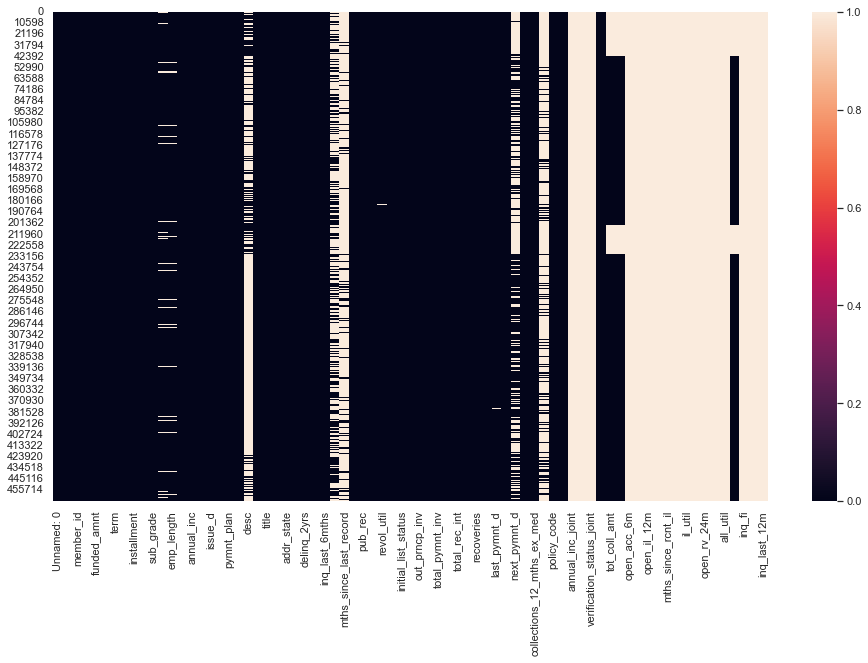

In [419]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull());

In [1058]:
pd.options.display.max_columns=None

In [1059]:
df.sample()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
191713      191713  1606795    1878394      15000        15000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
191713          15000.0   36 months     14.33       515.08     C        C1   

                     emp_title emp_length home_ownership  annual_inc  \
191713  Anne Grady corporation    8 years           RENT     42000.0   

       verification_status issue_d loan_status pymnt_plan  \
191713        Not Verified  Oct-12  Fully Paid          n   

                                                      url  \
191713  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc      purpose  \
191713    Borrower added on 10/12/12 > Loan is to cons...  credit_card   

                          title zip_code addr_state    dti  delinq_2yrs  \
191713  Credit card refinancing    435xx         OH  19.49          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
191713           Jul-05             0.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
191713                     NaN      15.0      0.0      18153        74.1   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
191713       21.0                   f        0.0            0.0  18541.28291   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
191713         18541.28          15000.0        3541.28                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
191713         0.0                      0.0       Oct-15            517.8   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
191713          NaN             Jan-16                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
191713                          NaN            1       INDIVIDUAL   

        annual_inc_joint  dti_joint  verification_status_joint  \
191713               NaN        NaN                        NaN   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
191713             0.0           0.0      46805.0          NaN         NaN   

        open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
191713          NaN          NaN                 NaN           NaN      NaN   

        open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
191713          NaN          NaN         NaN       NaN           24500.0   

        inq_fi  total_cu_tl  inq_last_12m  
191713     NaN          NaN           NaN

In [1060]:
#preprocessing continous variables

In [1061]:
df[['term','emp_length']]

term emp_length
0        36 months  10+ years
1        60 months   < 1 year
2        36 months  10+ years
3        36 months  10+ years
4        60 months     1 year
...            ...        ...
466280   60 months    4 years
466281   60 months  10+ years
466282   60 months    7 years
466283   36 months    3 years
466284   36 months  10+ years

[466285 rows x 2 columns]

In [1062]:
df['emp_length'].apply(str).value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
nan           21008
9 years       17888
Name: emp_length, dtype: int64

In [1063]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a','')
df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')

In [1064]:
df['emp_length_int'].dtypes

dtype('O')

In [1065]:
type(df['emp_length_int'][0])

str

In [1066]:
df['emp_length_int']=pd.to_numeric(df['emp_length_int'])

In [1067]:
type(df['emp_length_int'][0])

numpy.float64

In [1068]:
df['term'].apply(str).value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [1069]:
df['term_int'] = df['term'].str.replace(' months','')

In [1070]:
df['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [1071]:
type(df['term_int'][0])

str

In [1072]:
df['term_int']=pd.to_numeric(df['term_int'])

In [1073]:
type(df['term_int'][0])

numpy.int64

In [1074]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [1075]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'] , format = '%b-%y')

In [1076]:
type(df['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1077]:
pd.to_datetime('2017-12-03') - df['earliest_cr_line_date']

0        12024 days
1         6821 days
2         5876 days
3         7976 days
4         8007 days
            ...    
466280    5360 days
466281    7490 days
466282    5846 days
466283    5419 days
466284    6515 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [1078]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [1079]:
df['mths_since_earliest_cr_line'].describe().T

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [1080]:
df.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][df['mths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [1081]:
df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line']<0] = df['mths_since_earliest_cr_line'].max()

In [1082]:
min(df['mths_since_earliest_cr_line'])

73.0

In [1083]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [1084]:
#Preprocessing discrete variables

#grade
#subgrdae
#home ownership
#verification_status
#loan_status
#purpose
#addr_state
#initial_list_status

#need to create dummy varibale for all the categories values of discrete var

In [1085]:
df['grade']

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [1086]:
pd.get_dummies(df['grade'] , prefix='grade',prefix_sep=':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [1087]:
df_dummies = [
              pd.get_dummies(df['grade'],prefix='grade',prefix_sep=':'),
              pd.get_dummies(df['sub_grade'],prefix='sub_grade',prefix_sep=':'),
              pd.get_dummies(df['home_ownership'],prefix='home_ownership',prefix_sep=':'),
              pd.get_dummies(df['verification_status'],prefix='verification_status',prefix_sep=':'),
              pd.get_dummies(df['loan_status'],prefix='loan_status',prefix_sep=':'),
              pd.get_dummies(df['purpose'],prefix='purpose',prefix_sep=':'),
              pd.get_dummies(df['addr_state'],prefix='addr_state',prefix_sep=':'),
              pd.get_dummies(df['initial_list_status'],prefix='initial_list_status',prefix_sep=':')             
             ]

In [1088]:
df_dummies[1]

sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             1             0   
466284             0             0             0             0             0   

        sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0                  0             1             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             1   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0                  0             0             0             0             0   
1                  0             0             0             1             0   
2                  0             0             0             0             1   
3                  1             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             1             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             1   
466282             1             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             1             0             0   

        sub_grade:E1  sub_grade:E2  sub_grade:E3  sub_grade:E4  sub_grade:E5  \
0                  0             0             0             0             0   
1   

In [1089]:
pd.concat(df_dummies,axis=1)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0             0        1        0        0        0        0        0   
1             0        0        1        0        0        0        0   
2             0        0        1        0        0        0        0   
3             0        0        1        0        0        0        0   
4             0        1        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
466280        0        0        1        0        0        0        0   
466281        0        0        0        1        0        0        0   
466282        0        0        0        1        0        0        0   
466283        1        0        0        0        0        0        0   
466284        0        0        0        1        0        0        0   

        sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             1             0   
466284             0             0             0             0             0   

        sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0                  0             1             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             1   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0                  0             0             0             0             0   
1                  0             0             0             1             0   
2                  0             0             0             0             1   
3                  1             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             1             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2       

In [1090]:
df_dummies = pd.concat(df_dummies,axis=1)

In [1091]:
type(df_dummies)

pandas.core.frame.DataFrame

In [1092]:
df = pd.concat([df,df_dummies],axis=1)

In [1093]:
df.shape

(466285, 207)

In [1094]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=207)

In [1095]:
#dealing to missing values

In [1096]:
df.isnull().sum().sort_values(ascending=False).head(43)

open_il_12m                    466285
all_util                       466285
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
open_acc_6m                    466285
open_il_6m                     466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
open_il_24m                    466285
inq_fi                         466285
total_cu_tl                    466285
inq_last_12m                   466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
total_rev_hi_lim                70276
tot_cur_bal                     70276
tot_coll_amt                    70276
emp_title                       27588
emp_length  

In [1097]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'] , inplace=True)

In [1098]:
df['total_rev_hi_lim'].isnull().sum()

0

In [1099]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)

In [1100]:
df['emp_length_int'].isnull().sum()

0

In [1101]:
#Dependent variable

In [1102]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [1103]:
df['loan_status'].value_counts()/df['loan_status'].count()*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [1104]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off','Default',
                                                  'Does not meet the credit policy. Status:Charged Off',
                                                  'Late (31-120 days)']),0,1)

In [1105]:
df['good_bad'].apply(str).value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [1106]:
#splitting

In [1107]:
from sklearn.model_selection import train_test_split

In [1108]:
train_test_split(df.drop('good_bad',axis=1),df['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 272850      272850  32028570   34641775      12000        12000   
 368370      368370  19116061   21318792      33000        33000   
 397937      397937  15280936    1590264      15000        15000   
 379985      379985  17633271   19765814      29000        29000   
 86557        86557   7389951    9051908       5000         5000   
 ...            ...       ...        ...        ...          ...   
 436372      436372  12247536   14239641      25000        25000   
 419085      419085  13147653   15169843      12600        12600   
 322902      322902  24665473   27098422       8000         8000   
 38011        38011    368555     383227       4000         4000   
 420001      420001  13157115   15189303      15000        15000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 272850         12000.00   36 months      9.17       382.55     B        B1   
 368370         33000.00

In [1109]:
loan_data_inputs_train ,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(df.drop('good_bad',axis=1),df['good_bad'])

In [1110]:
loan_data_inputs_train.shape

(349713, 207)

In [1111]:
loan_data_inputs_test.shape

(116572, 207)

In [1112]:
loan_data_targets_train.shape

(349713,)

In [1113]:
loan_data_targets_test.shape

(116572,)

In [1114]:
loan_data_inputs_train ,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(df.drop('good_bad',axis=1),df['good_bad'], test_size=0.2,random_state=42)

In [1115]:
loan_data_inputs_train.shape

(373028, 207)

In [1116]:
loan_data_inputs_test.shape

(93257, 207)

In [1117]:
loan_data_targets_train.shape

(373028,)

In [1118]:
loan_data_targets_test.shape

(93257,)

In [1119]:
#Data preparation

In [1120]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train

In [1259]:
df_inputs_prepr= loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [1260]:
df_inputs_prepr.shape

(93257, 207)

In [1261]:
df_inputs_prepr.sample()

Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
37125       37125  389660     424070      20000        20000         15381.19   

             term  int_rate  installment grade sub_grade           emp_title  \
37125   36 months     12.21        666.3     B        B5  David Fong, D.D.S.   

      emp_length home_ownership  annual_inc verification_status issue_d  \
37125    6 years           RENT     51500.0     Source Verified  Apr-09   

      loan_status pymnt_plan  \
37125  Fully Paid          n   

                                                     url  \
37125  https://www.lendingclub.com/browse/loanDetail....   

                                                    desc purpose  \
37125  I am requesting this loan for:  1.  A used car...     car   

                         title zip_code addr_state  dti  delinq_2yrs  \
37125  Auto/Medical Combo Loan    913xx         CA  3.1          0.0   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
37125           Jun-01             0.0                     NaN   

       mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
37125                     NaN       8.0      0.0         99         0.4   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
37125       12.0                   f        0.0            0.0     23984.19   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
37125         17954.39          20000.0        3984.19                 0.0   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
37125         0.0                      0.0       Apr-12           682.72   

      next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
37125          NaN             Apr-12                         0.0   

       mths_since_last_major_derog  policy_code application_type  \
37125                          NaN            1       INDIVIDUAL   

       annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
37125               NaN        NaN                        NaN             0.0   

       tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
37125           NaN          NaN          NaN         NaN          NaN   

       open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
37125          NaN                 NaN           NaN      NaN          NaN   

       open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
37125          NaN         NaN       NaN           20000.0     NaN   

       total_cu_tl  inq_last_12m  emp_length_int  term_int  \
37125          NaN           NaN             6.0        36   

      earliest_cr_line_date  mths_since_earliest_cr_line issue_d_date  \
37125            2001-06-01                        198.0   2009-04-01   

       mths_since_issue_d  grade:A  grade:B  grade:C  grade:D  grade:E  \
37125               104.0        0        1        0        0        0   

       grade:F  grade:G  sub_grade:A1  sub_grade:A2  sub_grade:A3  \
37125        0        0             0             0             0   

       sub_grade:A4  sub_grade:A5  sub_grade:B1  sub_grade:B2  sub_grade:B3  \
37125             0             0             0             0             0   

       sub_grade:B4  sub_grade:B5  sub_grade:C1  sub_grade:C2  sub_grade:C3  \
37125             0             1             0             0             0   

       sub_grade:C4  sub_grade:C5  sub_grade:D1  sub_grade:D2  sub_grade:D3  \
37125             0             0             0             0             0   

       sub_grade:D4  sub_grade:D5  sub_grade:E1  sub_grade:E2  sub_grade:E3  \
37125             0             0             0             0             0   

       sub_grade:E4  sub_grade:E5  sub_grade:F1  sub_grade:F2  sub_grade:F3  \
37125             0             0             0             0             0   

       sub_grade:F4  sub_grade:F5  sub_grade:G1  sub_grade:G2  sub_gra

In [1262]:
df_targets_prepr.sample()

153531    1
Name: good_bad, dtype: int32

In [1263]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [1264]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)
df1

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1
...      ...       ...
115        B         1
296284     B         1
61777      A         0
91763      A         1
167512     A         1

[93257 rows x 2 columns]

In [1265]:
#A showing highest creditworthiness
#D showing lowest creditworthiness

In [1266]:
#we will find out woe(weight of evidence) as  woe= ln(%good_proprtn/%bad_proprtn)
# WOE inversally proportion to default

In [1267]:
df1.groupby(df1.columns.values[0] , as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [1268]:
df1.groupby(df1.columns.values[0] , as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.962338
1     B  0.923085
2     C  0.882905
3     D  0.844314
4     E  0.805178
5     F  0.775472
6     G  0.697605

In [1269]:
pd.concat([df1.groupby(df1.columns.values[0] , as_index=False)[df1.columns.values[1]].count(),
            df1.groupby(df1.columns.values[0] , as_index=False)[df1.columns.values[1]].mean()],axis=1)

grade  good_bad grade  good_bad
0     A     15108     A  0.962338
1     B     27199     B  0.923085
2     C     25048     C  0.882905
3     D     15390     D  0.844314
4     E      7145     E  0.805178
5     F      2699     F  0.775472
6     G       668     G  0.697605

In [1270]:
df1 = pd.concat([df1.groupby(df1.columns.values[0] , as_index=False)[df1.columns.values[1]].count(),
            df1.groupby(df1.columns.values[0] , as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [1271]:
df1.iloc[:,[0,1,3]]

grade  good_bad  good_bad
0     A     15108  0.962338
1     B     27199  0.923085
2     C     25048  0.882905
3     D     15390  0.844314
4     E      7145  0.805178
5     F      2699  0.775472
6     G       668  0.697605

In [1272]:
df1 = df1.iloc[:,[0,1,3]]
df1

grade  good_bad  good_bad
0     A     15108  0.962338
1     B     27199  0.923085
2     C     25048  0.882905
3     D     15390  0.844314
4     E      7145  0.805178
5     F      2699  0.775472
6     G       668  0.697605

In [1273]:
df1.columns.values[0]

'grade'

In [1274]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [1275]:
df1

grade  n_obs  prop_good
0     A  15108   0.962338
1     B  27199   0.923085
2     C  25048   0.882905
3     D  15390   0.844314
4     E   7145   0.805178
5     F   2699   0.775472
6     G    668   0.697605

In [1276]:
df1['prop_n_obs']= df1['n_obs']/df1['n_obs'].sum()

In [1277]:
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.962338    0.162004
1     B  27199   0.923085    0.291656
2     C  25048   0.882905    0.268591
3     D  15390   0.844314    0.165028
4     E   7145   0.805178    0.076616
5     F   2699   0.775472    0.028942
6     G    668   0.697605    0.007163

In [1278]:
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']

In [1279]:
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.962338    0.162004  14539.0   569.0
1     B  27199   0.923085    0.291656  25107.0  2092.0
2     C  25048   0.882905    0.268591  22115.0  2933.0
3     D  15390   0.844314    0.165028  12994.0  2396.0
4     E   7145   0.805178    0.076616   5753.0  1392.0
5     F   2699   0.775472    0.028942   2093.0   606.0
6     G    668   0.697605    0.007163    466.0   202.0

In [1280]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()

In [1281]:
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

In [1282]:
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   
1     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
2     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
5     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
6     G    668   0.697605    0.007163    466.0   202.0     0.005610   

   prop_n_bad  
0    0.055839  
1    0.205299  
2    0.287831  
3    0.235132  
4    0.136605  
5    0.059470  
6    0.019823

In [1283]:
df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [1284]:
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   
1     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
2     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
5     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
6     G    668   0.697605    0.007163    466.0   202.0     0.005610   

   prop_n_bad       WoE  
0    0.055839  1.142469  
1    0.205299  0.386785  
2    0.287831 -0.078010  
3    0.235132 -0.407554  
4    0.136605 -0.679261  
5    0.059470 -0.858767  
6    0.019823 -1.262323

In [1285]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  
0    0.019823 -1.262323  
1    0.059470 -0.858767  
2    0.136605 -0.679261  
3    0.235132 -0.407554  
4    0.287831 -0.078010  
5    0.205299  0.386785  
6    0.055839  1.142469

In [1286]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [1287]:
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.019823 -1.262323             NaN       NaN  
1    0.059470 -0.858767        0.077868  0.403556  
2    0.136605 -0.679261        0.029706  0.179506  
3    0.235132 -0.407554        0.039136  0.271707  
4    0.287831 -0.078010        0.038590  0.329543  
5    0.205299  0.386785        0.040181  0.464796  
6    0.055839  1.142469        0.039252  0.755683

In [1288]:
df1['IV'] = (df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']

df1['IV'] = df1['IV'].sum()

df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.300551  
1    0.059470 -0.858767        0.077868  0.403556  0.300551  
2    0.136605 -0.679261        0.029706  0.179506  0.300551  
3    0.235132 -0.407554        0.039136  0.271707  0.300551  
4    0.287831 -0.078010        0.038590  0.329543  0.300551  
5    0.205299  0.386785        0.040181  0.464796  0.300551  
6    0.055839  1.142469        0.039252  0.755683  0.300551

In [1289]:
df.shape

(466285, 208)

In [1290]:
#Automating woe & iv calculation for discrete variables

In [1291]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [1292]:
woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.300551  
1    0.059470 -0.858767        0.077868  0.403556  0.300551  
2    0.136605 -0.679261        0.029706  0.179506  0.300551  
3    0.235132 -0.407554        0.039136  0.271707  0.300551  
4    0.287831 -0.078010        0.038590  0.329543  0.300551  
5    0.205299  0.386785        0.040181  0.464796  0.300551  
6    0.055839  1.142469        0.039252  0.755683  0.300551

In [1293]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.300551  
1    0.059470 -0.858767        0.077868  0.403556  0.300551  
2    0.136605 -0.679261        0.029706  0.179506  0.300551  
3    0.235132 -0.407554        0.039136  0.271707  0.300551  
4    0.287831 -0.078010        0.038590  0.329543  0.300551  
5    0.205299  0.386785        0.040181  0.464796  0.300551  
6    0.055839  1.142469        0.039252  0.755683  0.300551

In [1294]:
#visualizing results

In [1295]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

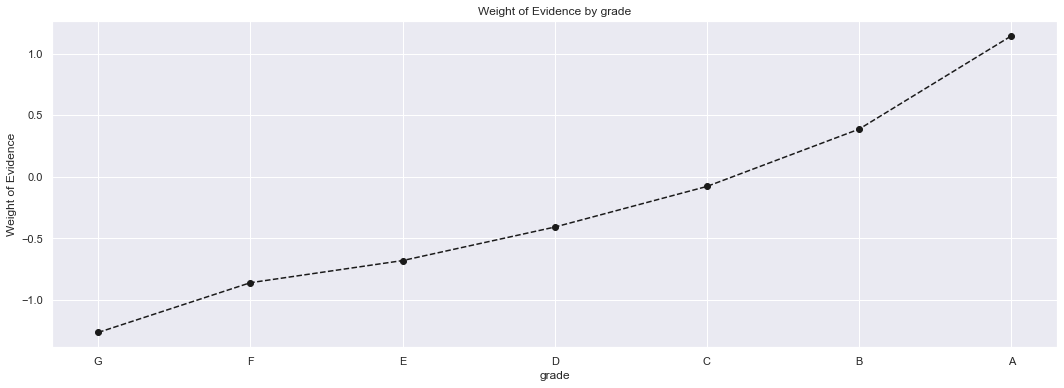

In [1296]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

In [1297]:
#creating dummy variables

#will keep separate worst category as a reference category 

In [1298]:
df_temp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.777778    0.000483     35.0    10.0     0.000421   
1           NONE     10   0.800000    0.000107      8.0     2.0     0.000096   
2           RENT  37874   0.874003    0.406125  33102.0  4772.0     0.398498   
3            OWN   8409   0.888572    0.090170   7472.0   937.0     0.089951   
4       MORTGAGE  46919   0.904751    0.503115  42450.0  4469.0     0.511033   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000981 -0.845478             NaN       NaN  0.022938  
1    0.000196 -0.711946        0.022222  0.133531  0.022938  
2    0.468302 -0.161412        0.074003  0.550534  0.022938  
3    0.091953 -0.022006        0.014568  0.139406  0.022938  
4    0.438567  0.152922        0.016179  0.174928  0.022938

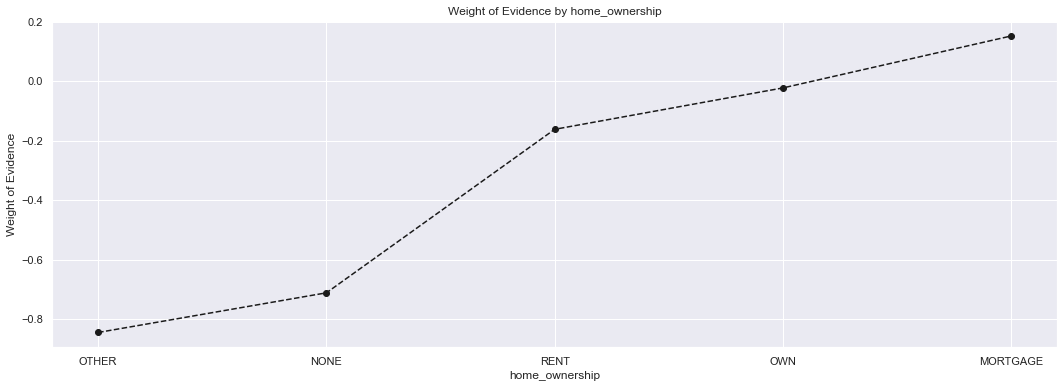

In [1299]:
plot_by_woe(df_temp)

In [1300]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']
                                                            ] )

In [1301]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [1302]:
df_temp = woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)

In [1303]:
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000011      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
2          NV   1298   0.855932    0.013919   1111.0   187.0     0.013375   
3          HI    486   0.860082    0.005211    418.0    68.0     0.005032   
4          FL   6426   0.870059    0.068906   5591.0   835.0     0.067307   
5          AL   1182   0.873096    0.012675   1032.0   150.0     0.012424   
6          NJ   3676   0.875408    0.039418   3218.0   458.0     0.038740   
7          LA   1130   0.876106    0.012117    990.0   140.0     0.011918   
8          NY   8031   0.879965    0.086117   7067.0   964.0     0.085076   
9          RI    403   0.880893    0.004321    355.0    48.0     0.004274   
10         NC   2478   0.881759    0.026572   2185.0   293.0     0.026304   
11         MI   2358   0.882103    0.025285   2080.0   278.0     0.025040   
12         DE    208   0.884615    0.002230    184.0    24.0     0.002215   
13         MD   2203   0.884703    0.023623   1949.0   254.0     0.023463   
14         OK    833   0.885954    0.008932    738.0    95.0     0.008884   
15         MO   1491   0.885983    0.015988   1321.0   170.0     0.015903   
16         AR    728   0.887363    0.007806    646.0    82.0     0.007777   
17         PA   3334   0.888122    0.035751   2961.0   373.0     0.035646   
18         SD    179   0.888268    0.001919    159.0    20.0     0.001914   
19         AZ   2067   0.888728    0.022165   1837.0   230.0     0.022115   
20         NM    513   0.888889    0.005501    456.0    57.0     0.005490   
21         CA  14251   0.889411    0.152814  12675.0  1576.0     0.152588   
22         MA   2214   0.893857    0.023741   1979.0   235.0     0.023824   
23         GA   3015   0.893864    0.032330   2695.0   320.0     0.032444   
24         IN   1315   0.894297    0.014101   1176.0   139.0     0.014157   
25         VA   2856   0.894958    0.030625   2556.0   300.0     0.030770   
26         NH    402   0.895522    0.004311    360.0    42.0     0.004334   
27         OH   3102   0.895551    0.033263   2778.0   324.0     0.033443   
28         UT    672   0.895833    0.007206    602.0    70.0     0.007247   
29         WI   1171   0.896670    0.012557   1050.0   121.0     0.012640   
30         MN   1632   0.897059    0.017500   1464.0   168.0     0.017624   
31         WA   2145   0.899767    0.023001   1930.0   215.0     0.023234   
32         CO   1916   0.906054    0.020545   1736.0   180.0     0.020899   
33         TX   7281   0.906057    0.078075   6597.0   684.0     0.079418   
34         SC   1135   0.906608    0.012171   1029.0   106.0     0.012388   
35         TN   1139   0.906936    0.012214   1033.0   106.0     0.012436   
36         OR   1135   0.907489    0.012171   1030.0   105.0     0.012400   
37         IL   3779   0.908706    0.040522   3434.0   345.0     0.041340   
38         KY    851   0.909518    0.009125    774.0    77.0     0.009318   
39         CT   1429   0.909727    0.015323   1300.0   129.0     0.015650   
40         WV    486   0.917695    0.005211    446.0    40.0     0.005369   
41         WY    209   0.918660    0.002241    192.0    17.0     0.002311   
42         AK    248   0.919355    0.002659    228.0    20.0     0.002745   
43         KS    830   0.920482    0.008900    764.0    66.0     0.009197   
44         VT    178   0.921348    0.001909    164.0    14.0     0.001974   
45         DC    297   0.922559    0.003185    274.0    23.0     0.003299   
46         MS    246   0.922764    0.002638    227.0    19.0     0.002733   
47         MT    293   0.928328    0.003142    272.0    21.0     0.003274   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000098   

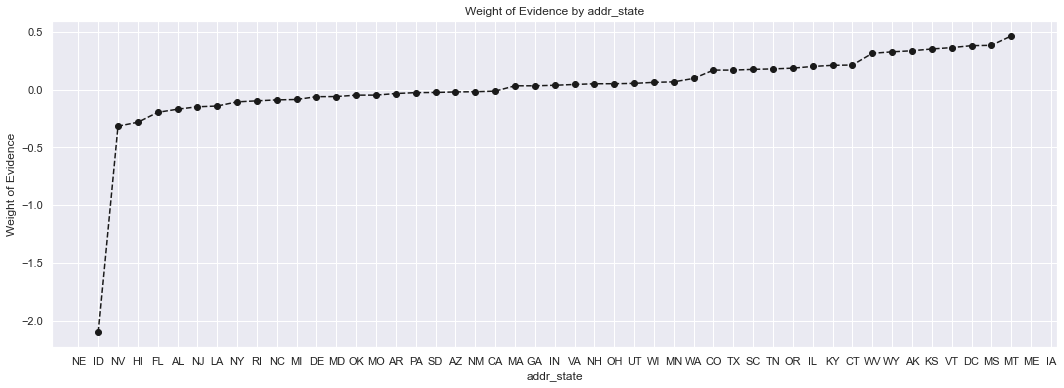

In [1304]:
plot_by_woe(df_temp)

In [1305]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

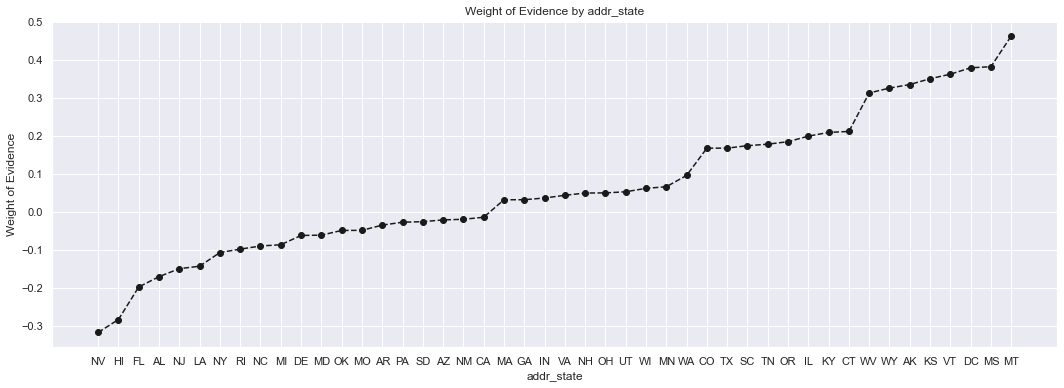

In [1306]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

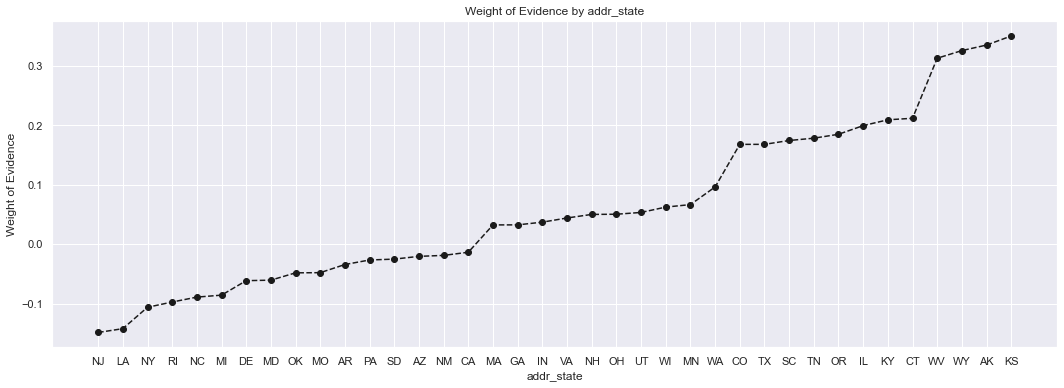

In [1307]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [1308]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [1309]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.872031    0.360734  29336.0  4305.0   
1     Source Verified  29963   0.895738    0.321295  26839.0  3124.0   
2        Not Verified  29653   0.906890    0.317971  26892.0  2761.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353161    0.422473 -0.179202             NaN       NaN  0.022684  
1     0.323101    0.306575  0.052501        0.023707  0.231704  0.022684  
2     0.323739    0.270952  0.177995        0.011152  0.125494  0.022684

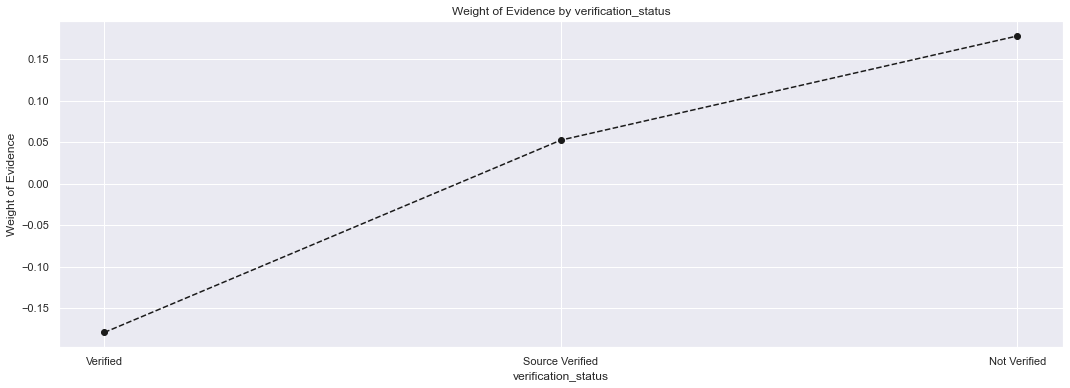

In [1310]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1311]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89   0.752809    0.000954     67.0    22.0   
1     renewable_energy     70   0.771429    0.000751     54.0    16.0   
2       small_business   1431   0.777079    0.015345   1112.0   319.0   
3              medical    918   0.857298    0.009844    787.0   131.0   
4                house    439   0.858770    0.004707    377.0    62.0   
5                other   4806   0.861007    0.051535   4138.0   668.0   
6              wedding    456   0.864035    0.004890    394.0    62.0   
7               moving    602   0.878738    0.006455    529.0    73.0   
8             vacation    496   0.881048    0.005319    437.0    59.0   
9   debt_consolidation  55012   0.885916    0.589897  48736.0  6276.0   
10      major_purchase   1991   0.900552    0.021350   1793.0   198.0   
11    home_improvement   5299   0.906397    0.056821   4803.0   496.0   
12                 car   1072   0.916045    0.011495    982.0    90.0   
13         credit_card  20576   0.916505    0.220638  18858.0  1718.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000807    0.002159 -0.984590             NaN       NaN  0.045124  
1      0.000650    0.001570 -0.881845        0.018620  0.102745  0.045124  
2      0.013387    0.031305 -0.849516        0.005650  0.032329  0.045124  
3      0.009474    0.012856 -0.305210        0.080220  0.544307  0.045124  
4      0.004539    0.006084 -0.293130        0.001471  0.012080  0.045124  
5      0.049815    0.065554 -0.274561        0.002237  0.018569  0.045124  
6      0.004743    0.006084 -0.249024        0.003028  0.025537  0.045124  
7      0.006368    0.007164 -0.117712        0.014702  0.131312  0.045124  
8      0.005261    0.005790 -0.095845        0.002311  0.021867  0.045124  
9      0.586707    0.615898 -0.048556        0.004867  0.047289  0.045124  
10     0.021585    0.019431  0.105138        0.014637  0.153693  0.045124  
11     0.057821    0.048675  0.172179        0.005845  0.067042  0.045124  
12     0.011822    0.008832  0.291541        0.009647  0.119362  0.045124  
13     0.227022    0.168597  0.297536        0.000460  0.005995  0.045124

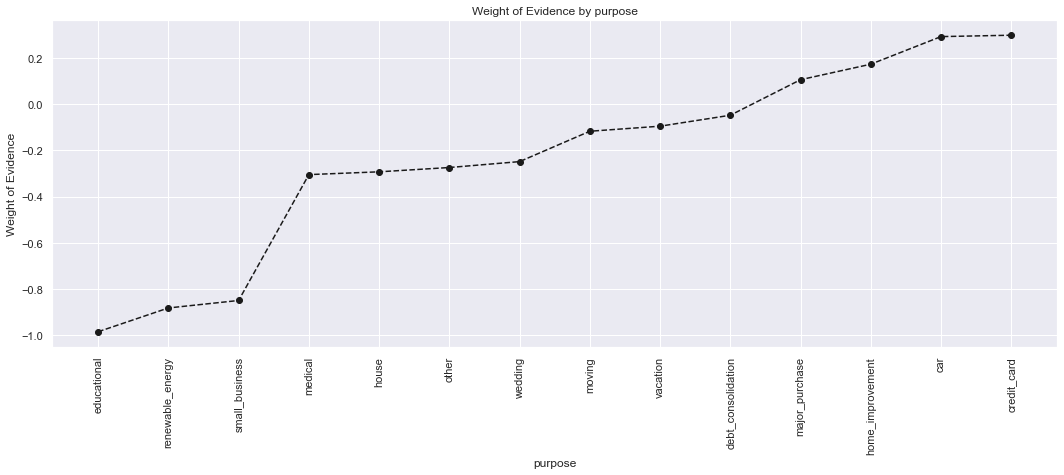

In [1312]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1313]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [1314]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.879685    0.648648  53213.0  7278.0   
1                   w  32766   0.911127    0.351352  29854.0  2912.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.640603     0.71423 -0.108794             NaN       NaN  0.024888  
1     0.359397     0.28577  0.229238        0.031443  0.338032  0.024888

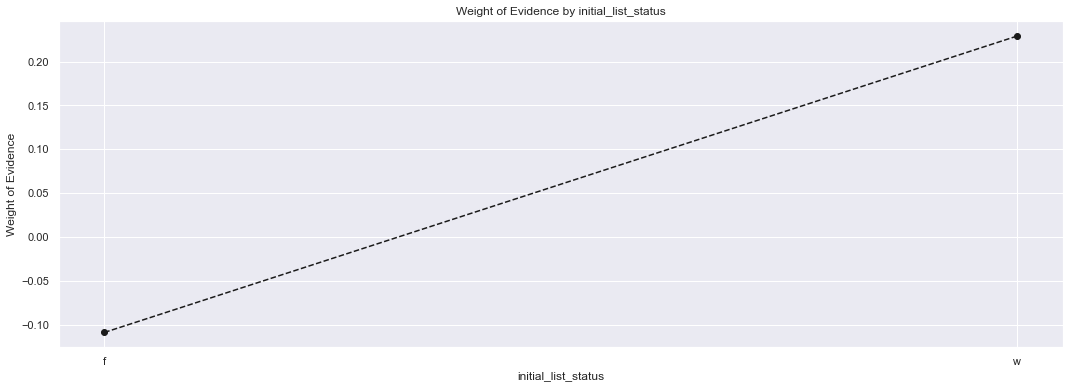

In [1315]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1316]:
#Automating calculations and visualizing results

In [1317]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [1318]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([60, 36], dtype=int64)

In [1319]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.902597    0.724171  60956.0  6578.0     0.733817   
1        60  25723   0.859581    0.275829  22111.0  3612.0     0.266183   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.645535  0.128181             NaN       NaN  0.036603  
1    0.354465 -0.286427        0.043016  0.414608  0.036603

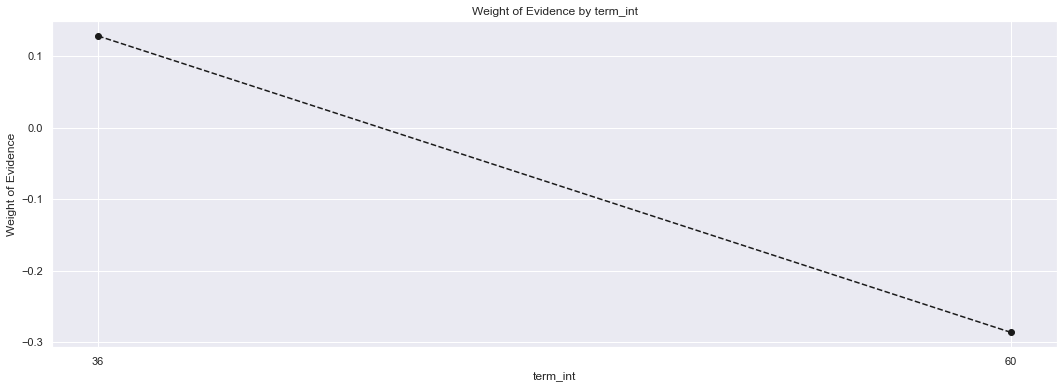

In [1320]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1321]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [1322]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [1323]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  11553   0.874491    0.123883  10103.0  1450.0   
1              1.0   5968   0.892594    0.063995   5327.0   641.0   
2              2.0   8295   0.887402    0.088948   7361.0   934.0   
3              3.0   7391   0.889325    0.079254   6573.0   818.0   
4              4.0   5555   0.889469    0.059567   4941.0   614.0   
5              5.0   6172   0.886261    0.066183   5470.0   702.0   
6              6.0   5225   0.878852    0.056028   4592.0   633.0   
7              7.0   5131   0.893588    0.055020   4585.0   546.0   
8              8.0   4542   0.890137    0.048704   4043.0   499.0   
9              9.0   3621   0.892847    0.038828   3233.0   388.0   
10            10.0  29804   0.900517    0.319590  26839.0  2965.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.121625    0.142296 -0.156972             NaN       NaN  0.007766  
1      0.064129    0.062905  0.019273        0.018102  0.176245  0.007766  
2      0.088615    0.091658 -0.033766        0.005192  0.053039  0.007766  
3      0.079129    0.080275 -0.014377        0.001923  0.019389  0.007766  
4      0.059482    0.060255 -0.012913        0.000144  0.001465  0.007766  
5      0.065850    0.068891 -0.045140        0.003208  0.032228  0.007766  
6      0.055281    0.062120 -0.116640        0.007409  0.071500  0.007766  
7      0.055196    0.053582  0.029686        0.014736  0.146326  0.007766  
8      0.048672    0.048970 -0.006104        0.003451  0.035790  0.007766  
9      0.038920    0.038077  0.021920        0.002711  0.028024  0.007766  
10     0.323101    0.290972  0.104738        0.007669  0.082819  0.007766

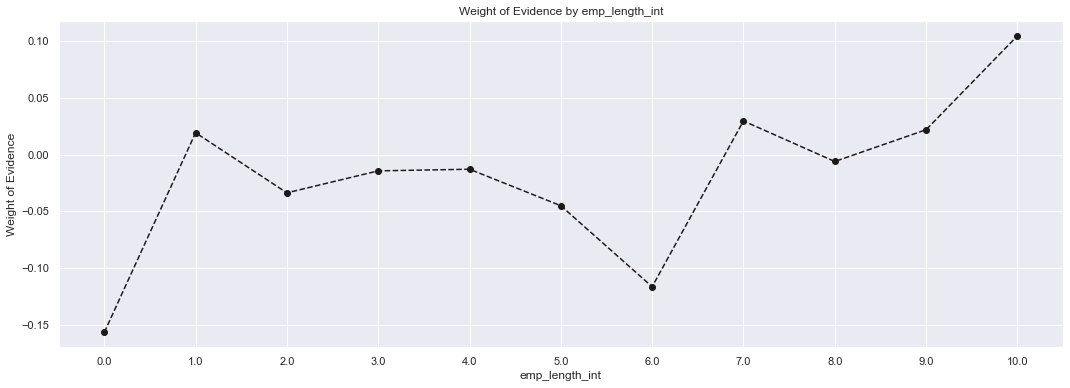

In [1324]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1325]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [1326]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [1327]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [1328]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [1329]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (35.91, 37.8]   7191   0.945766    0.077109  6801.0  390.0   
1               (37.8, 39.6]   9752   0.930373    0.104571  9073.0  679.0   
2               (39.6, 41.4]   9506   0.919945    0.101933  8745.0  761.0   
3               (41.4, 43.2]   7240   0.909116    0.077635  6582.0  658.0   
4               (43.2, 45.0]   7217   0.902868    0.077388  6516.0  701.0   
5               (45.0, 46.8]   3104   0.895296    0.033284  2779.0  325.0   
6               (46.8, 48.6]   6197   0.890269    0.066451  5517.0  680.0   
7               (48.6, 50.4]   5821   0.885930    0.062419  5157.0  664.0   
8               (50.4, 52.2]   5021   0.878909    0.053840  4413.0  608.0   
9               (52.2, 54.0]   4497   0.874138    0.048222  3931.0  566.0   
10              (54.0, 55.8]   2064   0.866279    0.022132  1788.0  276.0   
11              (55.8, 57.6]   3572   0.861422    0.038303  3077.0  495.0   
12              (57.6, 59.4]   2904   0.850895    0.031140  2471.0  433.0   
13              (59.4, 61.2]   2474   0.847615    0.026529  2097.0  377.0   
14              (61.2, 63.0]   2539   0.851910    0.027226  2163.0  376.0   
15              (63.0, 64.8]   1115   0.837668    0.011956   934.0  181.0   
16              (64.8, 66.6]   1721   0.816967    0.018454  1406.0  315.0   
17              (66.6, 68.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (68.4, 70.2]   1097   0.839562    0.011763   921.0  176.0   
19              (70.2, 72.0]   1001   0.816184    0.010734   817.0  184.0   
20              (72.0, 73.8]    447   0.829978    0.004793   371.0   76.0   
21              (73.8, 75.6]    790   0.853165    0.008471   674.0  116.0   
22              (75.6, 77.4]    754   0.867374    0.008085   654.0  100.0   
23              (77.4, 79.2]    690   0.844928    0.007399   583.0  107.0   
24              (79.2, 81.0]    599   0.876461    0.006423   525.0   74.0   
25              (81.0, 82.8]    254   0.870079    0.002724   221.0   33.0   
26              (82.8, 84.6]    533   0.878049    0.005715   468.0   65.0   
27              (84.6, 86.4]    459   0.836601    0.004922   384.0   75.0   
28              (86.4, 88.2]    443   0.864560    0.004750   383.0   60.0   
29              (88.2, 90.0]    439   0.863326    0.004707   379.0   60.0   
30              (90.0, 91.8]    194   0.835052    0.002080   162.0   32.0   
31              (91.8, 93.6]    367   0.896458    0.003935   329.0   38.0   
32              (93.6, 95.4]    257   0.879377    0.002756   226.0   31.0   
33              (95.4, 97.2]    276   0.836957    0.002960   231.0   45.0   
34              (97.2, 99.0]    234   0.829060    0.002509   194.0   40.0   
35             (99.0, 100.8]    100   0.920000    0.001072    92.0    8.0   
36            (100.8, 102.6]    170   0.835294    0.001823   142.0   28.0   
37            (102.6, 104.4]    150   0.873333    0.001608   131.0   19.0   
38            (104.4, 106.2]    129   0.868217    0.001383   112.0   17.0   
39            (106.2, 108.0]    119   0.815126    0.001276    97.0   22.0   
40            (108.0, 109.8]     36   0.861111    0.000386    31.0    5.0   
41            (109.8, 111.6]     40   0.800000    0.000429    32.0    8.0   
42            (111.6, 113.4]     37   0.972973    0.000397    36.0    1.0   
43            (113.4, 115.2]     57   0.824561    0.000611    47.0   10.0   
44            (115.2, 117.0]    131   0.801527    0.001405   105.0   26.0   
45            (117.0, 118.8]     59   0.813559    0.000633    48.0   11.0   
46            (118.8, 120.6]     83   0.734940    0.000890    61.0   22.0   
47            (120.6, 122.4]     41   0.609756    0.000440    25.0   16.0   
48            (122.4, 124.2]     23   0.695652    0.000247    16.0    7.0   
49            (124.2, 126.0]     17   0.882353    0.000182    15.0    2.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  

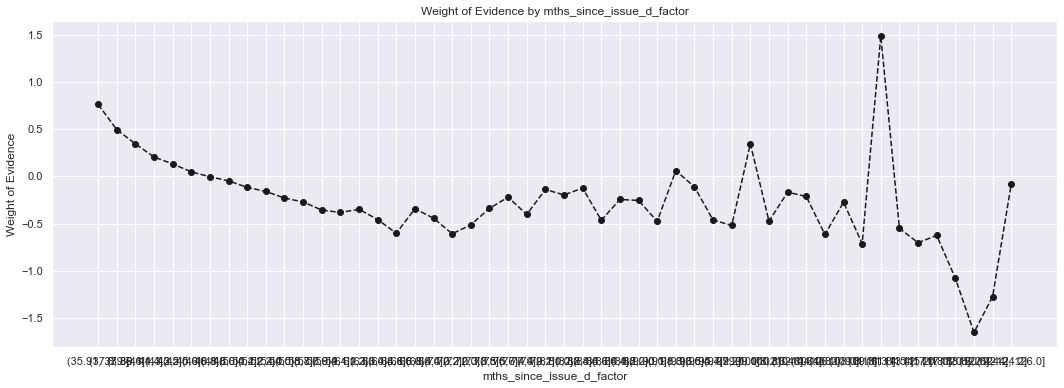

In [1330]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

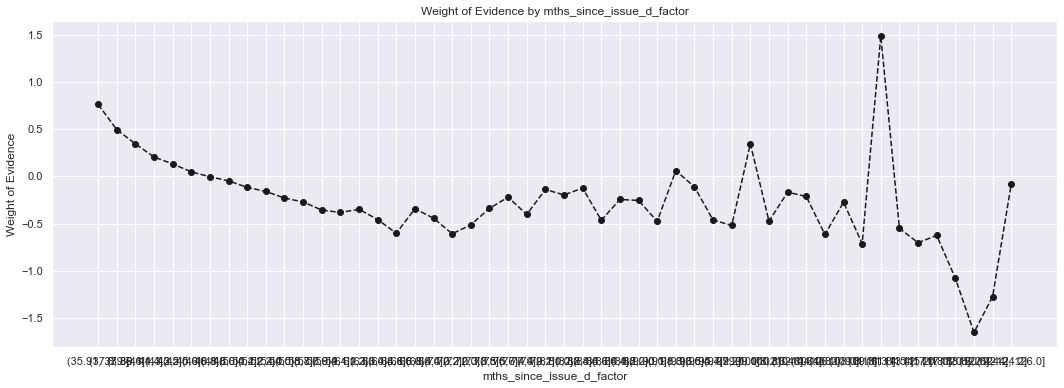

In [1331]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

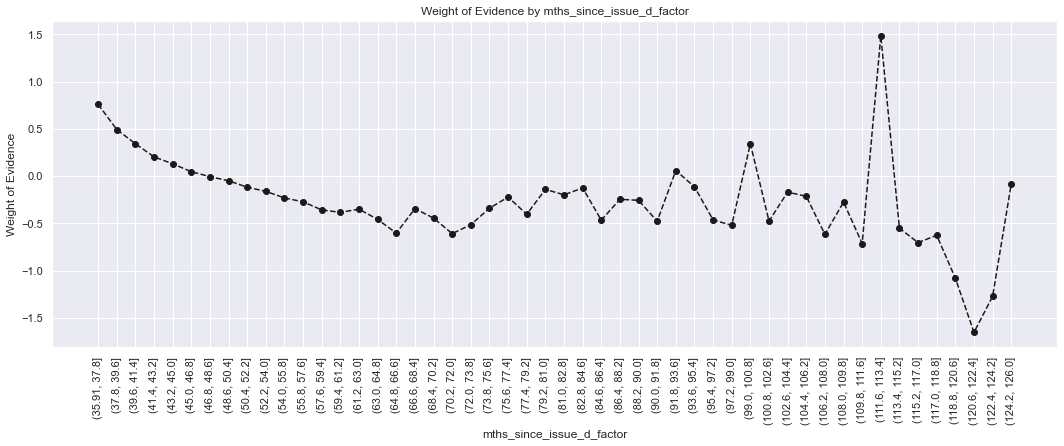

In [1332]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

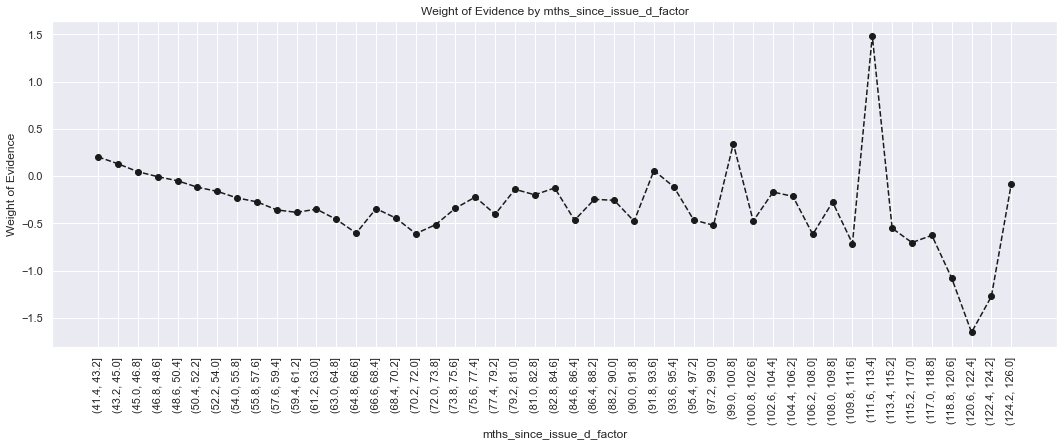

In [1333]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [1334]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [1335]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [1336]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866    0.022368  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138    0.021167  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782    0.005115   454.0   23.0   
4     (7.071, 7.484]    804   0.981343    0.008621   789.0   15.0   
5     (7.484, 7.897]   3245   0.965485    0.034796  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009    0.026046  2310.0  119.0   
7      (8.31, 8.722]   1680   0.965476    0.018015  1622.0   58.0   
8     (8.722, 9.135]   2384   0.942114    0.025564  2246.0  138.0   
9     (9.135, 9.548]   1590   0.976730    0.017050  1553.0   37.0   
10    (9.548, 9.961]   1881   0.931419    0.020170  1752.0  129.0   
11   (9.961, 10.374]   2766   0.936370    0.029660  2590.0  176.0   
12  (10.374, 10.786]   1390   0.917986    0.014905  1276.0  114.0   
13  (10.786, 11.199]   4464   0.937500    0.047868  4185.0  279.0   
14  (11.199, 11.612]   1213   0.916735    0.013007  1112.0  101.0   
15  (11.612, 12.025]   3737   0.931496    0.040072  3481.0  256.0   
16  (12.025, 12.438]   3077   0.905752    0.032995  2787.0  290.0   
17   (12.438, 12.85]   2754   0.920116    0.029531  2534.0  220.0   
18   (12.85, 13.263]   5440   0.904044    0.058333  4918.0  522.0   
19  (13.263, 13.676]   3806   0.897793    0.040812  3417.0  389.0   
20  (13.676, 14.089]   2692   0.894874    0.028866  2409.0  283.0   
21  (14.089, 14.502]   5760   0.887153    0.061765  5110.0  650.0   
22  (14.502, 14.914]   1187   0.867734    0.012728  1030.0  157.0   
23  (14.914, 15.327]   4811   0.882145    0.051589  4244.0  567.0   
24   (15.327, 15.74]   3146   0.886840    0.033735  2790.0  356.0   
25   (15.74, 16.153]   1869   0.837346    0.020041  1565.0  304.0   
26  (16.153, 16.566]   3230   0.849226    0.034635  2743.0  487.0   
27  (16.566, 16.978]   1035   0.852174    0.011098   882.0  153.0   
28  (16.978, 17.391]   2843   0.848048    0.030486  2411.0  432.0   
29  (17.391, 17.804]   2992   0.837567    0.032083  2506.0  486.0   
30  (17.804, 18.217]    286   0.835664    0.003067   239.0   47.0   
31   (18.217, 18.63]   2729   0.827409    0.029263  2258.0  471.0   
32   (18.63, 19.042]   1835   0.820163    0.019677  1505.0  330.0   
33  (19.042, 19.455]   1135   0.786784    0.012171   893.0  242.0   
34  (19.455, 19.868]   1680   0.816667    0.018015  1372.0  308.0   
35  (19.868, 20.281]   1244   0.849678    0.013339  1057.0  187.0   
36  (20.281, 20.694]    805   0.814907    0.008632   656.0  149.0   
37  (20.694, 21.106]    956   0.791841    0.010251   757.0  199.0   
38  (21.106, 21.519]    701   0.757489    0.007517   531.0  170.0   
39  (21.519, 21.932]    222   0.801802    0.002381   178.0   44.0   
40  (21.932, 22.345]    832   0.775240    0.008922   645.0  187.0   
41  (22.345, 22.758]    586   0.737201    0.006284   432.0  154.0   
42   (22.758, 23.17]    375   0.741333    0.004021   278.0   97.0   
43   (23.17, 23.583]    655   0.778626    0.007024   510.0  145.0   
44  (23.583, 23.996]    408   0.750000    0.004375   306.0  102.0   
45  (23.996, 24.409]    393   0.834606    0.004214   328.0   65.0   
46  (24.409, 24.822]    436   0.786697    0.004675   343.0   93.0   
47  (24.822, 25.234]    351   0.792023    0.003764   278.0   73.0   
48  (25.234, 25.647]    194   0.757732    0.002080   147.0   47.0   
49   (25.647, 26.06]    474   0.738397    0.005083   350.0  124.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002311    0.000589  1.367495             NaN       NaN  0.371465  
1      0.024607    0.004122  1.786754        0.010169  0.419258  0.371465  
2      0.023102    0.005397  1.453986        0.007728  0.332768  0.371465  
3      0.005465    0.002257  0.884362        0.020356  0.569623  0.371465  
4      0.009498    0.001472  1.864475        0.029561  0.980113  0.371465  
5      0.037717    0.010991  

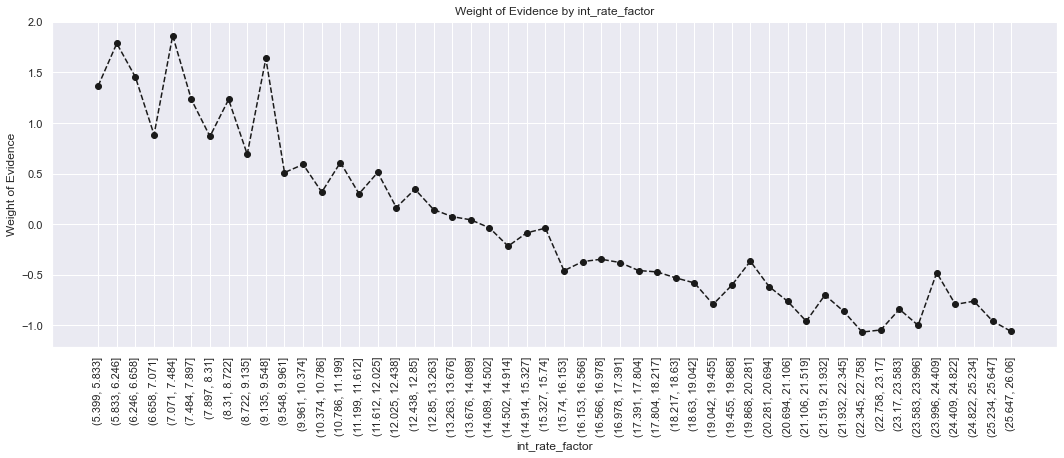

In [1337]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1338]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [1339]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [1340]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.880878    0.003421   281.0   38.0   
1     (1190.0, 1880.0]    800   0.896250    0.008578   717.0   83.0   
2     (1880.0, 2570.0]   1513   0.900198    0.016224  1362.0  151.0   
3     (2570.0, 3260.0]   1817   0.893781    0.019484  1624.0  193.0   
4     (3260.0, 3950.0]   1245   0.891566    0.013350  1110.0  135.0   
5     (3950.0, 4640.0]   2298   0.882942    0.024642  2029.0  269.0   
6     (4640.0, 5330.0]   3957   0.898155    0.042431  3554.0  403.0   
7     (5330.0, 6020.0]   4186   0.906593    0.044887  3795.0  391.0   
8     (6020.0, 6710.0]   1718   0.881839    0.018422  1515.0  203.0   
9     (6710.0, 7400.0]   2880   0.893403    0.030882  2573.0  307.0   
10    (7400.0, 8090.0]   4266   0.895218    0.045745  3819.0  447.0   
11    (8090.0, 8780.0]   1617   0.890538    0.017339  1440.0  177.0   
12    (8780.0, 9470.0]   2320   0.888793    0.024877  2062.0  258.0   
13   (9470.0, 10160.0]   8552   0.891955    0.091704  7628.0  924.0   
14  (10160.0, 10850.0]   1642   0.872716    0.017607  1433.0  209.0   
15  (10850.0, 11540.0]   2091   0.880918    0.022422  1842.0  249.0   
16  (11540.0, 12230.0]   5767   0.906190    0.061840  5226.0  541.0   
17  (12230.0, 12920.0]   1228   0.875407    0.013168  1075.0  153.0   
18  (12920.0, 13610.0]   1860   0.898925    0.019945  1672.0  188.0   
19  (13610.0, 14300.0]   2087   0.899377    0.022379  1877.0  210.0   
20  (14300.0, 14990.0]   1255   0.886853    0.013457  1113.0  142.0   
21  (14990.0, 15680.0]   5441   0.903143    0.058344  4914.0  527.0   
22  (15680.0, 16370.0]   2920   0.882534    0.031311  2577.0  343.0   
23  (16370.0, 17060.0]   1625   0.880000    0.017425  1430.0  195.0   
24  (17060.0, 17750.0]    921   0.850163    0.009876   783.0  138.0   
25  (17750.0, 18440.0]   2898   0.885783    0.031075  2567.0  331.0   
26  (18440.0, 19130.0]    989   0.858443    0.010605   849.0  140.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.896736    0.054205  4533.0  522.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.834034    0.005104   397.0   79.0   
31  (21890.0, 22580.0]   1028   0.883268    0.011023   908.0  120.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.898033    0.026711  2237.0  254.0   
35  (24650.0, 25340.0]   2500   0.903200    0.026808  2258.0  242.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003383    0.003729 -0.097472             NaN       NaN  0.018663  
1      0.008632    0.008145  0.057995        0.015372  0.155467  0.018663  
2      0.016396    0.014818  0.101189        0.003948  0.043194  0.018663  
3      0.019550    0.018940  0.031717        0.006417  0.069472  0.018663  
4 

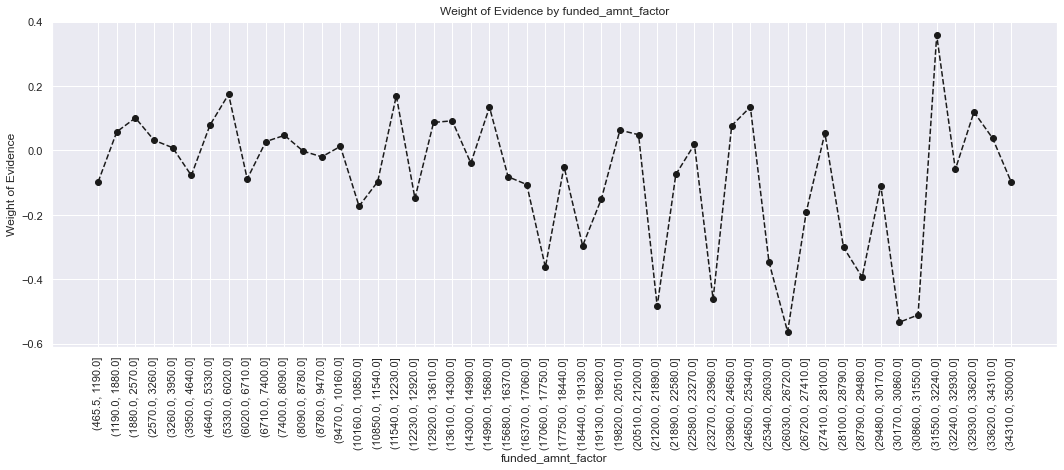

In [1341]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1342]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.587, 11.74]      5   1.000000    0.000054     5.0   
1                      (11.74, 23.48]      0        NaN    0.000000     NaN   
2                      (23.48, 35.22]      0        NaN    0.000000     NaN   
3                      (35.22, 46.96]      0        NaN    0.000000     NaN   
4                       (46.96, 58.7]      0        NaN    0.000000     NaN   
5                       (58.7, 70.44]      0        NaN    0.000000     NaN   
6                      (70.44, 82.18]    182   0.923077    0.001952   168.0   
7                      (82.18, 93.92]    508   0.913386    0.005447   464.0   
8                     (93.92, 105.66]    715   0.851748    0.007667   609.0   
9                     (105.66, 117.4]   1268   0.854890    0.013597  1084.0   
10                    (117.4, 129.14]   2314   0.875108    0.024813  2025.0   
11                   (129.14, 140.88]   2816   0.860795    0.030196  2424.0   
12                   (140.88, 152.62]   3366   0.882353    0.036094  2970.0   
13                   (152.62, 164.36]   3989   0.885686    0.042774  3533.0   
14                    (164.36, 176.1]   4857   0.886967    0.052082  4308.0   
15                    (176.1, 187.84]   5076   0.891450    0.054430  4525.0   
16                   (187.84, 199.58]   6578   0.882183    0.070536  5803.0   
17                   (199.58, 211.32]   7131   0.887393    0.076466  6328.0   
18                   (211.32, 223.06]   6775   0.884133    0.072649  5990.0   
19                    (223.06, 234.8]   5521   0.889875    0.059202  4913.0   
20                    (234.8, 246.54]   4966   0.884213    0.053251  4391.0   
21                   (246.54, 258.28]   4549   0.891185    0.048779  4054.0   
22                   (258.28, 270.02]   4472   0.891547    0.047954  3987.0   
23                   (270.02, 281.76]   3672   0.896786    0.039375  3293.0   
24                    (281.76, 293.5]   3640   0.900275    0.039032  3277.0   
25                    (293.5, 305.24]   2602   0.902767    0.027901  2349.0   
26                   (305.24, 316.98]   1988   0.908451    0.021317  1806.0   
27                   (316.98, 328.72]   2020   0.900990    0.021661  1820.0   
28                   (328.72, 340.46]   2129   0.901362    0.022829  1919.0   
29                    (340.46, 352.2]   1810   0.899448    0.019409  1628.0   
30                    (352.2, 363.94]   1477   0.914015    0.015838  1350.0   
31                   (363.94, 375.68]   1360   0.910294    0.014583  1238.0   
32                   (375.68, 387.42]   1152   0.905382    0.012353  1043.0   
33                   (387.42, 399.16]   1051   0.906755    0.011270   953.0   
34                    (399.16, 410.9]    826   0.917676    0.008857   758.0   
35                    (410.9, 422.64]    808   0.925743    0.008664   748.0   
36                   (422.64, 434.38]    524   0.895038    0.005619   469.0   
37                   (434.38, 446.12]    416   0.918269    0.004461   382.0   
38                   (446.12, 457.86]    329   0.917933    0.003528   302.0   
39                    (457.86, 469.6]    376   0.920213    0.004032   346.0   
40                    (469.6, 481.34]    371   0.916442    0.003978   340.0   
41                   (481.34, 493.08]    294   0.908163    0.003153   267.0   
42                   (493.08, 504.82]    229   0.943231    0.002456   216.0   
43                   (504.82, 516.56]    178   0.915730    0.001909   163.0   
44                    (516.56, 528.3]    159   0.924528    0.001705   147.0   
45                    (528.3, 540.04]    140   0.907143    0.001501   127.0   
46                   (540.04, 551.78]    135   0.903704    0.001448   122.0   
47                   (551.78, 563.52]     93   0.913978    0.000997    85.0   
48                   (563.52, 575.26]     80   0.862500    0.000858    69.0   
49                    (575.26, 587.0]    310   0.8677

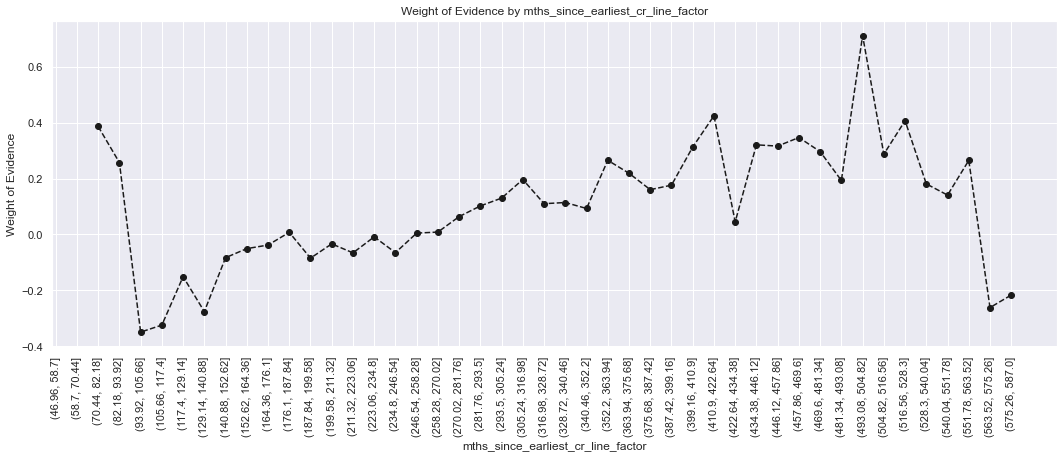

In [1343]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

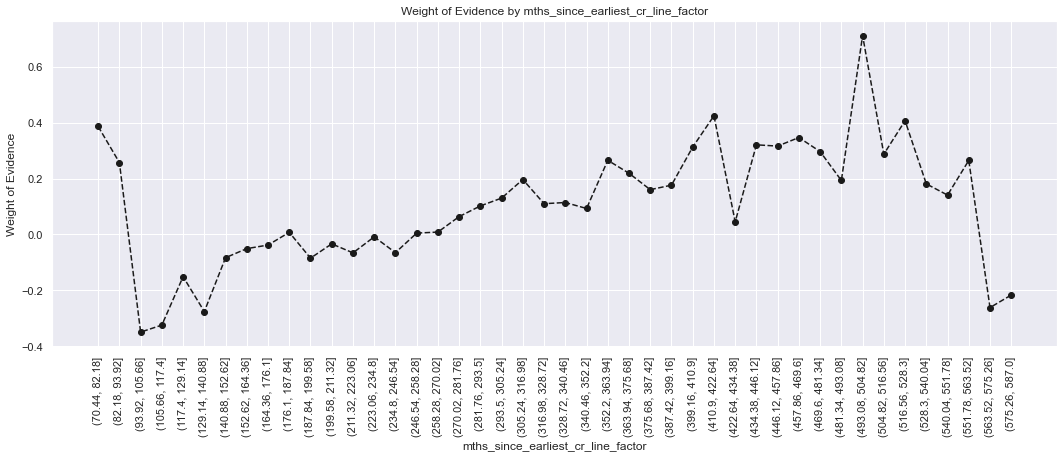

In [1344]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [1345]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [1346]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76566   0.890944    0.821021  68216.0  8350.0     0.821217   
1           1.0  11297   0.890413    0.121138  10059.0  1238.0     0.121095   
2           2.0   3192   0.885025    0.034228   2825.0   367.0     0.034009   
3           3.0   1134   0.893298    0.012160   1013.0   121.0     0.012195   
4           4.0    510   0.886275    0.005469    452.0    58.0     0.005441   
5           5.0    270   0.911111    0.002895    246.0    24.0     0.002961   
6           6.0    128   0.859375    0.001373    110.0    18.0     0.001324   
7           7.0     67   0.925373    0.000718     62.0     5.0     0.000746   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000313   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000253   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000096   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000120   
12         12.0      8   0.625000    0.000086      5.0     3.0     0.000060   
13         13.0      7   0.857143    0.000075      6.0     1.0     0.000072   
14         14.0      2   1.000000    0.000021      2.0     0.0     0.000024   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.819431  0.002177             NaN       NaN  inf  
1     0.121492 -0.003270        0.000530  0.005447  inf  
2     0.036016 -0.057339        0.005388  0.054069  inf  
3     0.011874  0.026640        0.008273  0.083979  inf  
4     0.005692 -0.045001        0.007024  0.071642  inf  
5     0.002355  0.229037        0.024837  0.274039  inf  
6     0.001766 -0.288132        0.051736  0.517169  inf  
7     0.000491  0.419456        0.065998  0.707588  inf  
8     0.000294  0.061244        0.028821  0.358212  inf  
9     0.000098  0.946282        0.057994  0.885038  inf  
10    0.000098 -0.018799        0.065657  0.965081  inf  
11    0.000000       inf        0.111111       inf  inf  
12    0.000294 -1.587415        0.375000       inf  inf  
13    0.000098 -0.306481        0.232143  1.280934  inf  
14    0.000000       inf        0.142857       inf  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf

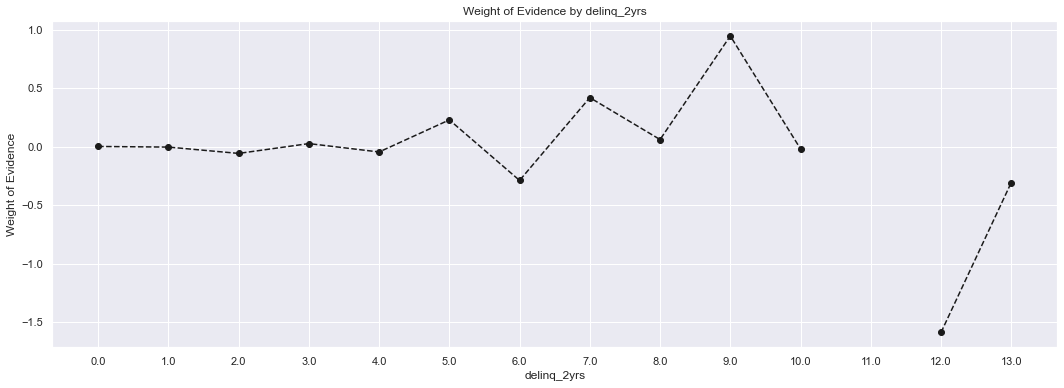

In [1347]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1348]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [1349]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.910094    0.517870  43953.0  4342.0   
1              1.0  25985   0.882394    0.278639  22929.0  3056.0   
2              2.0  11611   0.861252    0.124505  10000.0  1611.0   
3              3.0   5086   0.846245    0.054537   4304.0   782.0   
4              4.0   1431   0.841370    0.015345   1204.0   227.0   
5              5.0    551   0.842105    0.005908    464.0    87.0   
6              6.0    211   0.763033    0.002263    161.0    50.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.529127    0.426104  0.216545             NaN       NaN  inf  
1      0.276030    0.299902 -0.082945        0.027701  0.299490  inf  
2      0.120385    0.158096 -0.272511        0.021141  0.189566  inf  
3      0.051814    0.076742 -0.392795        0.015008  0.120285  inf  
4      0.014494    0.022277 -0.429786        0.004875  0.036991  inf  
5      0.005586    0.008538 -0.424264        0.000736  0.005522  inf  
6      0.001938    0.004907 -0.928859        0.079072  0.504595  inf  
7      0.000229    0.001668 -1.987015        0.235255  1.058156  inf  
8      0.000132    0.000981 -2.002930        0.003968  0.015915  inf  
9      0.000036    0.000393 -2.385923        0.095238  0.382992  inf  
10     0.000072    0.000098 -0.306481        0.428571  2.079442  inf  
11     0.000084    0.000000       inf        0.142857       inf  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000000    0.000098      -inf        1.000000       inf  inf  
14     0.000000    0.000098      -inf        0.000000       NaN  inf  
15     0.000012    0.000098 -2.098241        0.500000       inf  inf  
16     0.000012    0.000000       inf        0.500000       inf  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

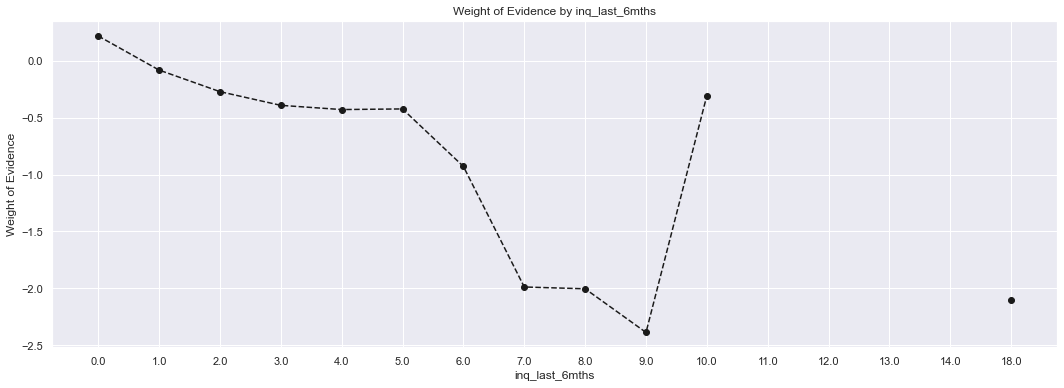

In [1350]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1351]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [1352]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000084   
1        1.0     32   0.875000    0.000343    28.0    4.0     0.000337   
2        2.0    334   0.838323    0.003582   280.0   54.0     0.003371   
3        3.0   1122   0.852941    0.012031   957.0  165.0     0.011521   
4        4.0   2560   0.892188    0.027451  2284.0  276.0     0.027496   
5        5.0   4403   0.891438    0.047214  3925.0  478.0     0.047251   
6        6.0   6216   0.890766    0.066655  5537.0  679.0     0.066657   
7        7.0   7433   0.886856    0.079704  6592.0  841.0     0.079358   
8        8.0   8314   0.893433    0.089151  7428.0  886.0     0.089422   
9        9.0   8768   0.888230    0.094020  7788.0  980.0     0.093756   
10      10.0   8576   0.889109    0.091961  7625.0  951.0     0.091793   
11      11.0   7740   0.894444    0.082996  6923.0  817.0     0.083342   
12      12.0   6886   0.887017    0.073839  6108.0  778.0     0.073531   
13      13.0   5914   0.893304    0.063416  5283.0  631.0     0.063599   
14      14.0   4960   0.895766    0.053186  4443.0  517.0     0.053487   
15      15.0   4006   0.892162    0.042957  3574.0  432.0     0.043026   
16      16.0   3269   0.898134    0.035054  2936.0  333.0     0.035345   
17      17.0   2680   0.886940    0.028738  2377.0  303.0     0.028615   
18      18.0   2259   0.902169    0.024223  2038.0  221.0     0.024534   
19      19.0   1811   0.893429    0.019419  1618.0  193.0     0.019478   
20      20.0   1444   0.898199    0.015484  1297.0  147.0     0.015614   
21      21.0   1037   0.880424    0.011120   913.0  124.0     0.010991   
22      22.0    784   0.887755    0.008407   696.0   88.0     0.008379   
23      23.0    628   0.904459    0.006734   568.0   60.0     0.006838   
24      24.0    473   0.890063    0.005072   421.0   52.0     0.005068   
25      25.0    391   0.882353    0.004193   345.0   46.0     0.004153   
26      26.0    250   0.884000    0.002681   221.0   29.0     0.002661   
27      27.0    204   0.911765    0.002188   186.0   18.0     0.002239   
28      28.0    153   0.895425    0.001641   137.0   16.0     0.001649   
29      29.0    128   0.843750    0.001373   108.0   20.0     0.001300   
30      30.0    107   0.906542    0.001147    97.0   10.0     0.001168   
31      31.0     73   0.890411    0.000783    65.0    8.0     0.000783   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000710   
33      33.0     47   0.851064    0.000504    40.0    7.0     0.000482   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000397   
35      35.0     33   0.939394    0.000354    31.0    2.0     0.000373   
36      36.0     22   0.772727    0.000236    17.0    5.0     0.000205   
37      37.0     21   0.857143    0.000225    18.0    3.0     0.000217   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000157   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000132   
40      40.0      9   0.555556    0.000097     5.0    4.0     0.000060   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000072   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000084   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000048   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000048   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

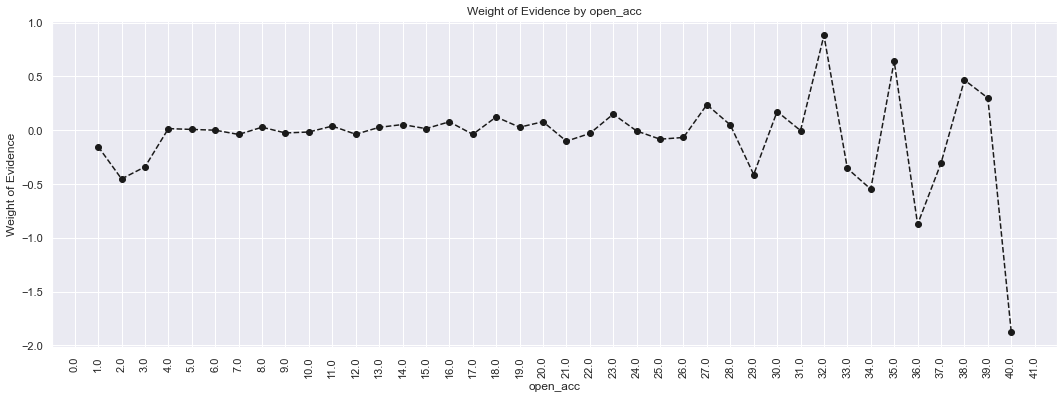

In [1353]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

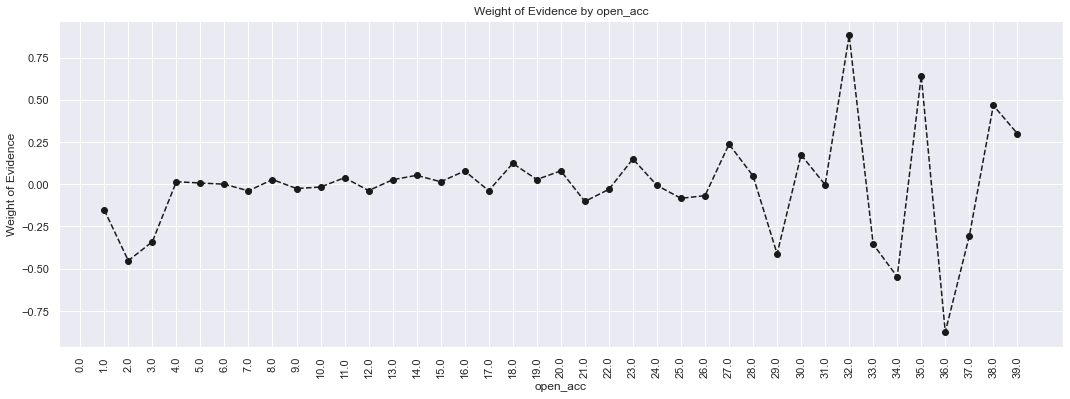

In [1354]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [1355]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [1356]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.889179    0.867742  71955.0  8968.0     0.866228   
1       1.0  10670   0.901125    0.114415   9615.0  1055.0     0.115750   
2       2.0   1097   0.904284    0.011763    992.0   105.0     0.011942   
3       3.0    331   0.900302    0.003549    298.0    33.0     0.003587   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001156   
5       5.0     73   0.904110    0.000783     66.0     7.0     0.000795   
6       6.0     19   0.894737    0.000204     17.0     2.0     0.000205   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000132   
8       8.0      5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000060   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.880079 -0.015862             NaN       NaN  inf  
1     0.103533  0.111543        0.011946  0.127405  inf  
2     0.010304  0.147522        0.003160  0.035979  inf  
3     0.003238  0.102345        0.003982  0.045177  inf  
4     0.001570 -0.306481        0.043159  0.408826  inf  
5     0.000687  0.145504        0.046967  0.451985  inf  
6     0.000196  0.041825        0.009373  0.103678  inf  
7     0.000294 -0.798958        0.109023  0.840783  inf  
8     0.000098 -0.711946        0.014286  0.087011  inf  
9     0.000000       inf        0.200000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

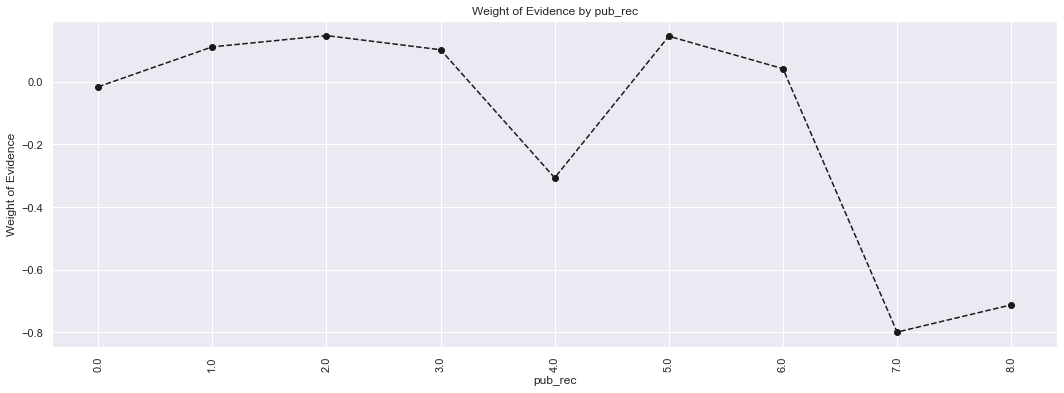

In [1357]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1358]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [1359]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.776000    0.001340     97.0    28.0   
1       (3.12, 6.24]   1499   0.850567    0.016074   1275.0   224.0   
2       (6.24, 9.36]   3715   0.871871    0.039836   3239.0   476.0   
3      (9.36, 12.48]   6288   0.874841    0.067427   5501.0   787.0   
4      (12.48, 15.6]   8289   0.888286    0.088883   7363.0   926.0   
5      (15.6, 18.72]   9843   0.890176    0.105547   8762.0  1081.0   
6     (18.72, 21.84]  10270   0.893866    0.110126   9180.0  1090.0   
7     (21.84, 24.96]   9971   0.892789    0.106920   8902.0  1069.0   
8     (24.96, 28.08]  11873   0.892108    0.127315  10592.0  1281.0   
9      (28.08, 31.2]   7289   0.892715    0.078160   6507.0   782.0   
10     (31.2, 34.32]   6151   0.902617    0.065958   5552.0   599.0   
11    (34.32, 37.44]   4745   0.905796    0.050881   4298.0   447.0   
12    (37.44, 40.56]   3615   0.897372    0.038764   3244.0   371.0   
13    (40.56, 43.68]   2883   0.890045    0.030915   2566.0   317.0   
14     (43.68, 46.8]   1938   0.891641    0.020781   1728.0   210.0   
15     (46.8, 49.92]   1478   0.905954    0.015849   1339.0   139.0   
16    (49.92, 53.04]   1309   0.902215    0.014036   1181.0   128.0   
17    (53.04, 56.16]    640   0.893750    0.006863    572.0    68.0   
18    (56.16, 59.28]    428   0.873832    0.004589    374.0    54.0   
19     (59.28, 62.4]    386   0.878238    0.004139    339.0    47.0   
20     (62.4, 65.52]    322   0.844720    0.003453    272.0    50.0   
21    (65.52, 68.64]     57   0.947368    0.000611     54.0     3.0   
22    (68.64, 71.76]     43   0.906977    0.000461     39.0     4.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001168    0.002748 -0.855734             NaN       NaN  inf  
1      0.015349    0.021982 -0.359185        0.074567  0.496549  inf  
2      0.038993    0.046712 -0.180639        0.021304  0.178547  inf  
3      0.066224    0.077233 -0.153784        0.002970  0.026855  inf  
4      0.088639    0.090873

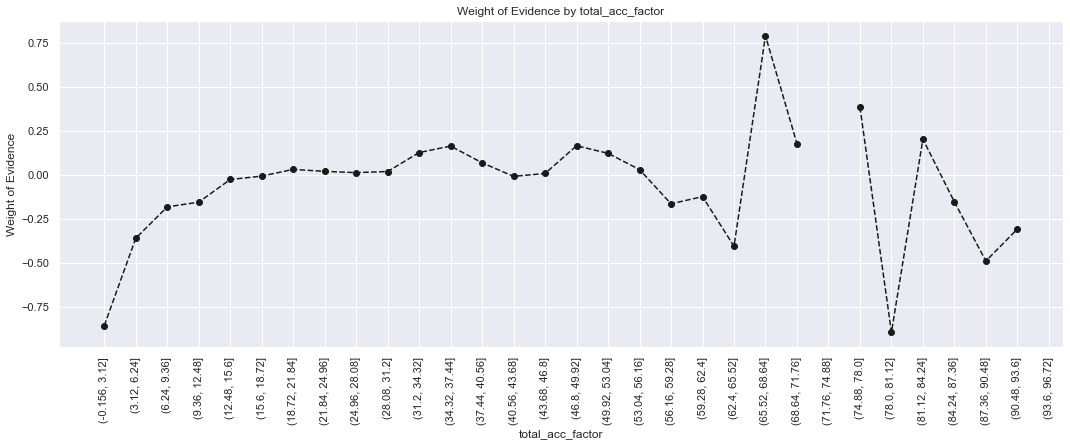

In [1360]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1361]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [1362]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0             0.0  92871   0.890827    0.995861  82732.0  10139.0   
1             1.0    360   0.872222    0.003860    314.0     46.0   
2             2.0     22   0.818182    0.000236     18.0      4.0   
3             3.0      4   0.750000    0.000043      3.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.995967    0.994995  0.000976             NaN       NaN  0.000298  
1     0.003780    0.004514 -0.177489        0.018605  0.178466  0.000298  
2     0.000217    0.000393 -0.594163        0.054040  0.416674  0.000298  
3     0.000036    0.000098 -0.999628        0.068182  0.405465  0.000298

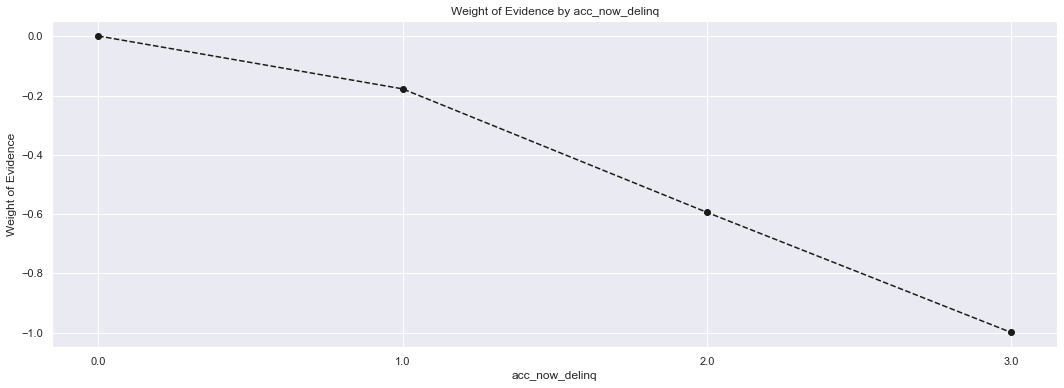

In [1363]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [1364]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [1365]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.840336    0.002552   200.0   38.0   
1           (1006.566, 2013.133]    678   0.827434    0.007270   561.0  117.0   
2             (2013.133, 3019.7]   1121   0.852810    0.012021   956.0  165.0   
3             (3019.7, 4026.266]   1461   0.878166    0.015666  1283.0  178.0   
4           (4026.266, 5032.832]   2163   0.867776    0.023194  1877.0  286.0   
...                          ...    ...        ...         ...     ...    ...   
1995  (2008100.168, 2009106.734]      0        NaN    0.000000     NaN    NaN   
1996  (2009106.734, 2010113.301]      0        NaN    0.000000     NaN    NaN   
1997  (2010113.301, 2011119.867]      0        NaN    0.000000     NaN    NaN   
1998  (2011119.867, 2012126.434]      0        NaN    0.000000     NaN    NaN   
1999    (2012126.434, 2013133.0]      1   1.000000    0.000011     1.0    0.0   

      prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0        0.002408    0.003729 -0.437509             NaN       NaN  inf  
1        0.006754    0.011482 -0.530694        0.012903  0.093184  inf  
2        0.011509    0.016192 -0.341428        0.025376  0.189265  inf  
3        0.015445    0.017468 -0.123068        0.025356  0.218360  inf  
4        0.022596    0.028067 -0.216802        0.010389  0.093735  inf  
...           ...         ...       ...             ...       ...  ...  
1995          NaN         NaN       NaN             NaN       NaN  inf  
1996          NaN         NaN       NaN             NaN       NaN  inf  
1997          NaN         NaN       NaN             NaN       NaN  inf  
1998          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.000012    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

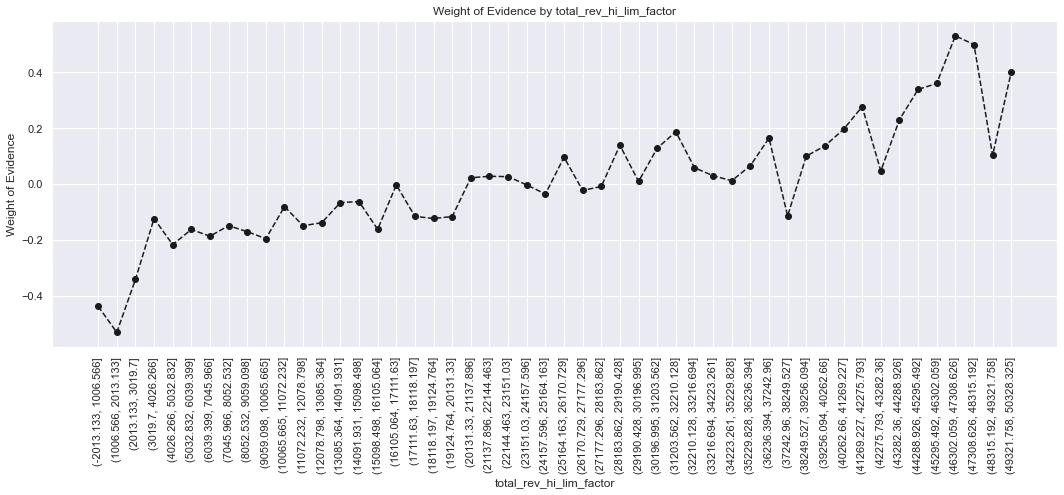

In [1366]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [1367]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [1368]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.872165    0.005201   423.0   62.0   
1       (43.585, 71.41]   1246   0.904494    0.013361  1127.0  119.0   
2       (71.41, 99.235]   1731   0.895436    0.018562  1550.0  181.0   
3      (99.235, 127.06]   2292   0.896597    0.024577  2055.0  237.0   
4     (127.06, 154.885]   2602   0.886241    0.027901  2306.0  296.0   
5     (154.885, 182.71]   4133   0.897653    0.044318  3710.0  423.0   
6     (182.71, 210.535]   4109   0.905086    0.044061  3719.0  390.0   
7     (210.535, 238.36]   3730   0.901877    0.039997  3364.0  366.0   
8     (238.36, 266.185]   4660   0.899785    0.049969  4193.0  467.0   
9     (266.185, 294.01]   4975   0.888844    0.053347  4422.0  553.0   
10    (294.01, 321.835]   5186   0.906286    0.055610  4700.0  486.0   
11    (321.835, 349.66]   6432   0.892568    0.068971  5741.0  691.0   
12    (349.66, 377.485]   4758   0.881673    0.051020  4195.0  563.0   
13    (377.485, 405.31]   4352   0.900276    0.046667  3918.0  434.0   
14    (405.31, 433.135]   3429   0.882765    0.036769  3027.0  402.0   
15    (433.135, 460.96]   3225   0.879380    0.034582  2836.0  389.0   
16    (460.96, 488.785]   3865   0.894437    0.041445  3457.0  408.0   
17    (488.785, 516.61]   3861   0.884227    0.041402  3414.0  447.0   
18    (516.61, 544.435]   2730   0.868864    0.029274  2372.0  358.0   
19    (544.435, 572.26]   2564   0.877535    0.027494  2250.0  314.0   
20    (572.26, 600.085]   2434   0.873870    0.026100  2127.0  307.0   
21    (600.085, 627.91]   2294   0.901918    0.024599  2069.0  225.0   
22    (627.91, 655.735]   2091   0.901004    0.022422  1884.0  207.0   
23    (655.735, 683.56]   2295   0.894989    0.024609  2054.0  241.0   
24    (683.56, 711.385]   1650   0.876970    0.017693  1447.0  203.0   
25    (711.385, 739.21]   1252   0.892173    0.013425  1117.0  135.0   
26    (739.21, 767.035]   1360   0.897794    0.014583  1221.0  139.0   
27    (767.035, 794.86]   1160   0.886207    0.012439  1028.0  132.0   
28    (794.86, 822.685]   1023   0.888563    0.010970   909.0  114.0   
29    (822.685, 850.51]    967   0.885212    0.010369   856.0  111.0   
30    (850.51, 878.335]   1046   0.894837    0.011216   936.0  110.0   
31    (878.335, 906.16]    707   0.861386    0.007581   609.0   98.0   
32    (906.16, 933.985]    604   0.855960    0.006477   517.0   87.0   
33    (933.985, 961.81]    635   0.861417    0.006809   547.0   88.0   
34    (961.81, 989.635]    460   0.850000    0.004933   391.0   69.0   
35   (989.635, 1017.46]    441   0.854875    0.004729   377.0   64.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.878641    0.002209   181.0   25.0   
38  (1073.11, 1100.935]    228   0.894737    0.002445   204.0   24.0   
39  (1100.935, 1128.76]    247   0.931174    0.002649   230.0   17.0   
40  (1128.76, 1156.585]    227   0.916300    0.002434   208.0   19.0   
41  (1156.585, 1184.41]    287   0.895470    0.003078   257.0   30.0   
42  (1184.41, 1212.235]    308   0.905844    0.003303   279.0   29.0   
43  (1212.235, 1240.06]    284   0.901408    0.003045   256.0   28.0   
44  (1240.06, 1267.885]    159   0.861635    0.001705   137.0   22.0   
45  (1267.885, 1295.71]    132   0.833333    0.001415   110.0   22.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.714286    0.000225    15.0    6.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005092    0.006084 -0.178003             NaN       NaN  inf  
1      0.013567    0.011678  0.149950        0.032329  0.327953  inf  
2      0.018660    0.017763  0.049273        0.009058  0.100678  inf  
3      0.024739    0.023258  0.061730        0.0

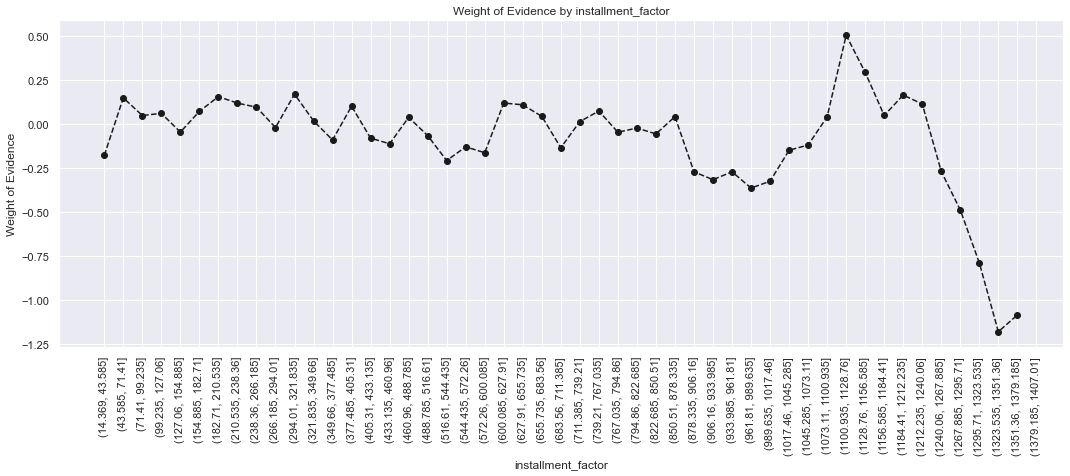

In [1369]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1370]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.889040    0.956529  79305.0  9898.0   
1     (154704.0, 304608.0]   3626   0.926641    0.038882   3360.0   266.0   
2     (304608.0, 454512.0]    282   0.929078    0.003024    262.0    20.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   0.956522    0.000247     22.0     1.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   0.500000    0.000021      1.0     1.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.9

In [1371]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.877932    0.671488  54977.0  7644.0   
1      (79752.0, 154704.0]  26582   0.915206    0.285040  24328.0  2254.0   
2     (154704.0, 229656.0]   2916   0.926269    0.031268   2701.0   215.0   
3     (229656.0, 304608.0]    710   0.928169    0.007613    659.0    51.0   
4     (304608.0, 379560.0]    171   0.929825    0.001834    159.0    12.0   
..                     ...    ...        ...         ...      ...     ...   
95  (7125240.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
96  (7200192.0, 7275144.0]      0        NaN    0.000000      NaN     NaN   
97  (7275144.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
98  (7350096.0, 7425048.0]      0        NaN    0.000000      NaN     NaN   
99  (7425048.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.661839    0.750147 -0.125247             NaN       NaN  inf  
1      0.292872    0.221197  0.280681        0.037273  0.405928  inf  
2      0.032516    0.021099  0.432499        0.011063  0.151818  inf  
3      0.007933    0.005005  0.460657        0.001900  0.028159  inf  
4      0.001914    0.001178  0.485757        0.001656  0.025100  inf  
..          ...         ...       ...             ...       ...  ...  
95          NaN         NaN       NaN             NaN       NaN  inf  
96          NaN         NaN       NaN             NaN       NaN  inf  
97          NaN         NaN       NaN             NaN       NaN  inf  
98          NaN         NaN       NaN             NaN       NaN  inf  
99     0.000024    0.000000       inf             NaN       NaN  inf  

[100 rows x 12 columns]

In [1372]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [1373]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.761905    0.000958    64.0   20.0   
2     (10208.0, 12912.0]    123   0.780488    0.001403    96.0   27.0   
3     (12912.0, 15616.0]    304   0.851974    0.003467   259.0   45.0   
4     (15616.0, 18320.0]    383   0.827676    0.004368   317.0   66.0   
5     (18320.0, 21024.0]    733   0.840382    0.008359   616.0  117.0   
6     (21024.0, 23728.0]    704   0.846591    0.008028   596.0  108.0   
7     (23728.0, 26432.0]   1785   0.861064    0.020356  1537.0  248.0   
8     (26432.0, 29136.0]   1355   0.853137    0.015452  1156.0  199.0   
9     (29136.0, 31840.0]   2292   0.854276    0.026137  1958.0  334.0   
10    (31840.0, 34544.0]   2130   0.855399    0.024290  1822.0  308.0   
11    (34544.0, 37248.0]   3525   0.853050    0.040198  3007.0  518.0   
12    (37248.0, 39952.0]   1926   0.880582    0.021963  1696.0  230.0   
13    (39952.0, 42656.0]   4973   0.867484    0.056710  4314.0  659.0   
14    (42656.0, 45360.0]   4038   0.875929    0.046048  3537.0  501.0   
15    (45360.0, 48064.0]   3015   0.880597    0.034382  2655.0  360.0   
16    (48064.0, 50768.0]   4397   0.878326    0.050142  3862.0  535.0   
17    (50768.0, 53472.0]   2898   0.885783    0.033048  2567.0  331.0   
18    (53472.0, 56176.0]   4143   0.873280    0.047245  3618.0  525.0   
19    (56176.0, 58880.0]   1810   0.883425    0.020641  1599.0  211.0   
20    (58880.0, 61584.0]   4726   0.881083    0.053894  4164.0  562.0   
21    (61584.0, 64288.0]   2246   0.895815    0.025613  2012.0  234.0   
22    (64288.0, 66992.0]   3455   0.895803    0.039400  3095.0  360.0   
23    (66992.0, 69696.0]   1965   0.907379    0.022408  1783.0  182.0   
24    (69696.0, 72400.0]   4096   0.899902    0.046709  3686.0  410.0   
25    (72400.0, 75104.0]   3495   0.897854    0.039856  3138.0  357.0   
26    (75104.0, 77808.0]    967   0.915202    0.011027   885.0   82.0   
27    (77808.0, 80512.0]   3571   0.901988    0.040723  3221.0  350.0   
28    (80512.0, 83216.0]   1319   0.924185    0.015041  1219.0  100.0   
29    (83216.0, 85920.0]   2274   0.899736    0.025932  2046.0  228.0   
30    (85920.0, 88624.0]   1144   0.905594    0.013046  1036.0  108.0   
31    (88624.0, 91328.0]   2425   0.924536    0.027654  2242.0  183.0   
32    (91328.0, 94032.0]   1141   0.911481    0.013012  1040.0  101.0   
33    (94032.0, 96736.0]   1562   0.913572    0.017813  1427.0  135.0   
34    (96736.0, 99440.0]    916   0.918122    0.010446   841.0   75.0   
35   (99440.0, 102144.0]   2307   0.902904    0.026308  2083.0  224.0   
36  (102144.0, 104848.0]    552   0.898551    0.006295   496.0   56.0   
37  (104848.0, 107552.0]   1094   0.932358    0.012476  1020.0   74.0   
38  (107552.0, 110256.0]   1562   0.915493    0.017813  1430.0  132.0   
39  (110256.0, 112960.0]    295   0.908475    0.003364   268.0   27.0   
40  (112960.0, 115664.0]    790   0.911392    0.009009   720.0   70.0   
41  (115664.0, 118368.0]    358   0.935754    0.004083   335.0   23.0   
42  (118368.0, 121072.0]   1473   0.918534    0.016798  1353.0  120.0   
43  (121072.0, 123776.0]    204   0.936275    0.002326   191.0   13.0   
44  (123776.0, 126480.0]    870   0.928736    0.009921   808.0   62.0   
45  (126480.0, 129184.0]    239   0.933054    0.002725   223.0   16.0   
46  (129184.0, 131888.0]    734   0.927793    0.008370   681.0   53.0   
47  (131888.0, 134592.0]    207   0.932367    0.002361   193.0   14.0   
48  (134592.0, 137296.0]    449   0.915367    0.005120   411.0   38.0   
49  (137296.0, 140000.0]    627   0.909091    0.007150   570.0   57.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000128    0.000000       inf             NaN       NaN  inf  
1      0.000822    0.002043 -0.911157        0.238095       inf  inf  
2      0.001232    0.002758 -0.805796        0.018583  0.105361  inf  

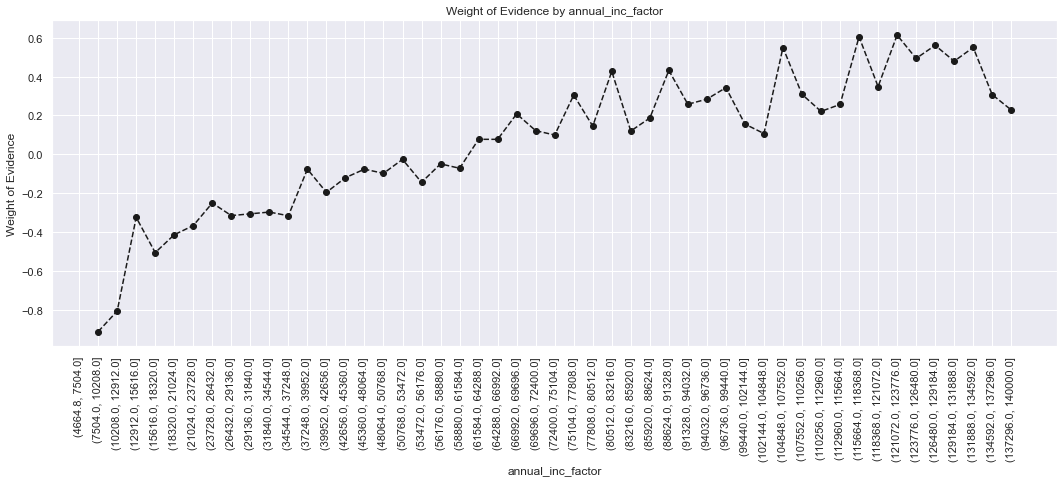

In [1374]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1375]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [1376]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.868694    0.031283  1171.0  177.0   
1                     (3.4, 6.8]   1890   0.880423    0.043861  1664.0  226.0   
2                    (6.8, 10.2]   3373   0.887044    0.078276  2992.0  381.0   
3                   (10.2, 13.6]   2496   0.895833    0.057924  2236.0  260.0   
4                   (13.6, 17.0]   3165   0.884044    0.073449  2798.0  367.0   
5                   (17.0, 20.4]   2282   0.893076    0.052958  2038.0  244.0   
6                   (20.4, 23.8]   2115   0.898345    0.049082  1900.0  215.0   
7                   (23.8, 27.2]   2755   0.895463    0.063934  2467.0  288.0   
8                   (27.2, 30.6]   1929   0.896319    0.044766  1729.0  200.0   
9                   (30.6, 34.0]   2453   0.891969    0.056926  2188.0  265.0   
10                  (34.0, 37.4]   1786   0.904255    0.041447  1615.0  171.0   
11                  (37.4, 40.8]   1765   0.887819    0.040960  1567.0  198.0   
12                  (40.8, 44.2]   2270   0.876211    0.052679  1989.0  281.0   
13                  (44.2, 47.6]   1664   0.899038    0.038616  1496.0  168.0   
14                  (47.6, 51.0]   1739   0.888442    0.040356  1545.0  194.0   
15                  (51.0, 54.4]   1158   0.887737    0.026873  1028.0  130.0   
16                  (54.4, 57.8]   1130   0.911504    0.026224  1030.0  100.0   
17                  (57.8, 61.2]   1423   0.895994    0.033023  1275.0  148.0   
18                  (61.2, 64.6]   1015   0.887685    0.023555   901.0  114.0   
19                  (64.6, 68.0]   1342   0.891952    0.031143  1197.0  145.0   
20                  (68.0, 71.4]    930   0.884946    0.021582   823.0  107.0   
21                  (71.4, 74.8]    928   0.889009    0.021536   825.0  103.0   
22                  (74.8, 78.2]   1195   0.907950    0.027732  1085.0  110.0   
23                  (78.2, 81.6]    768   0.880208    0.017823   676.0   92.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

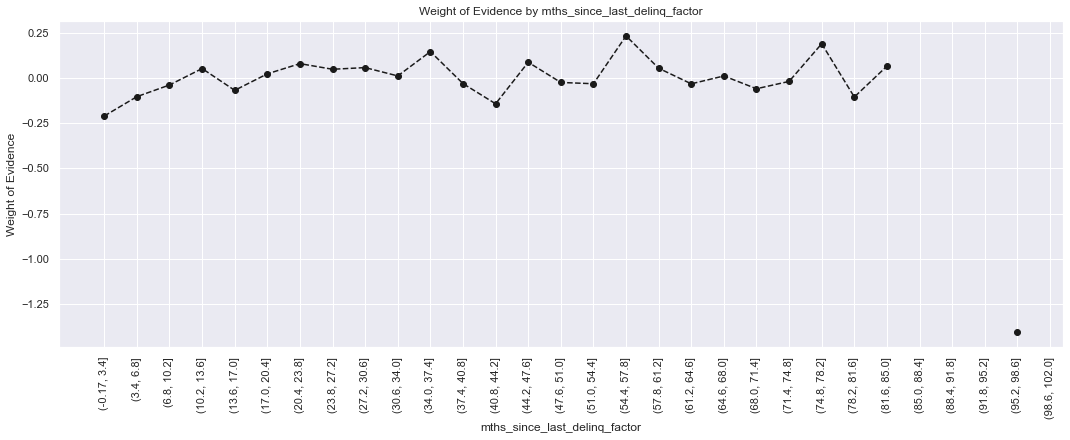

In [1377]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1378]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [1379]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      (-0.04, 0.4]    187   0.893048    0.002005   167.0   20.0     0.002010   
1        (0.4, 0.8]    184   0.880435    0.001973   162.0   22.0     0.001950   
2        (0.8, 1.2]    223   0.892377    0.002391   199.0   24.0     0.002396   
3        (1.2, 1.6]    255   0.905882    0.002734   231.0   24.0     0.002781   
4        (1.6, 2.0]    315   0.892063    0.003378   281.0   34.0     0.003383   
..              ...    ...        ...         ...     ...    ...          ...   
95  (37.991, 38.39]     54   0.888889    0.000579    48.0    6.0     0.000578   
96   (38.39, 38.79]     37   0.837838    0.000397    31.0    6.0     0.000373   
97   (38.79, 39.19]     45   0.844444    0.000483    38.0    7.0     0.000457   
98   (39.19, 39.59]     44   0.931818    0.000472    41.0    3.0     0.000494   
99   (39.59, 39.99]     57   0.859649    0.000611    49.0    8.0     0.000590   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.001963  0.024021             NaN       NaN  0.038146  
1     0.002159 -0.101687        0.012613  0.125708  0.038146  
2     0.002355  0.017010        0.011942  0.118697  0.038146  
3     0.002355  0.166123        0.013506  0.149113  0.038146  
4     0.003337  0.013753        0.013819  0.152370  0.038146  
..         ...       ...             ...       ...       ...  
95    0.000589 -0.018799        0.044444  0.387766  0.038146  
96    0.000589 -0.456013        0.051051  0.437214  0.038146  
97    0.000687 -0.406565        0.006607  0.049448  0.038146  
98    0.000294  0.516719        0.087374  0.923284  0.038146  
99    0.000785 -0.285862        0.072169  0.802581  0.038146  

[100 rows x 12 columns]

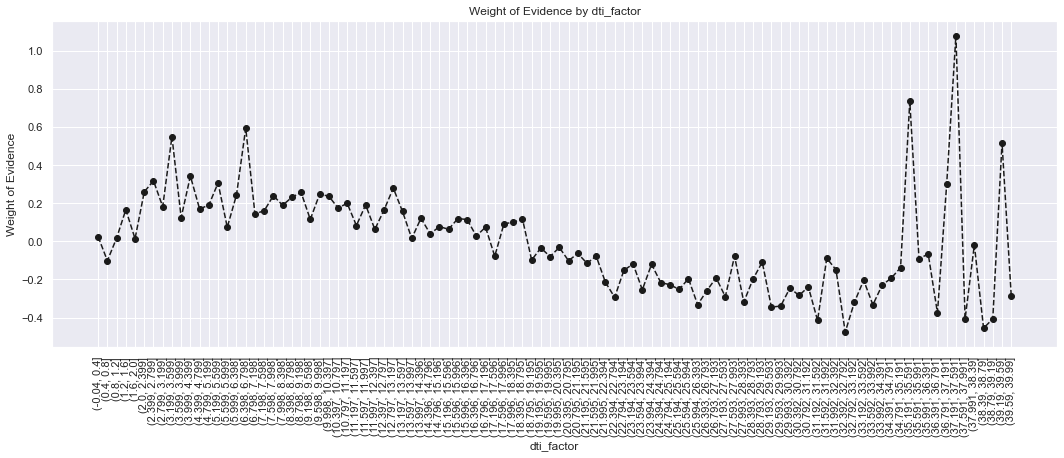

In [1380]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1381]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [1382]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    328   0.884146    0.003544   290.0   38.0     0.003518   
1      (0.7, 1.4]    393   0.903308    0.004246   355.0   38.0     0.004306   
2      (1.4, 2.1]    536   0.895522    0.005792   480.0   56.0     0.005823   
3      (2.1, 2.8]    607   0.915980    0.006559   556.0   51.0     0.006745   
4      (2.8, 3.5]    811   0.924784    0.008763   750.0   61.0     0.009098   
5      (3.5, 4.2]    970   0.903093    0.010481   876.0   94.0     0.010626   
6      (4.2, 4.9]   1140   0.913158    0.012318  1041.0   99.0     0.012628   
7      (4.9, 5.6]   1370   0.911679    0.014803  1249.0  121.0     0.015151   
8      (5.6, 6.3]   1491   0.904762    0.016111  1349.0  142.0     0.016364   
9      (6.3, 7.0]   1722   0.926829    0.018607  1596.0  126.0     0.019360   
10     (7.0, 7.7]   1846   0.904117    0.019946  1669.0  177.0     0.020246   
11     (7.7, 8.4]   2044   0.909491    0.022086  1859.0  185.0     0.022551   
12     (8.4, 9.1]   2097   0.910348    0.022659  1909.0  188.0     0.023157   
13     (9.1, 9.8]   2319   0.908150    0.025057  2106.0  213.0     0.025547   
14    (9.8, 10.5]   2519   0.909885    0.027218  2292.0  227.0     0.027803   
15   (10.5, 11.2]   2694   0.908315    0.029109  2447.0  247.0     0.029684   
16   (11.2, 11.9]   2748   0.901747    0.029693  2478.0  270.0     0.030060   
17   (11.9, 12.6]   2844   0.903657    0.030730  2570.0  274.0     0.031176   
18   (12.6, 13.3]   2886   0.908870    0.031184  2623.0  263.0     0.031819   
19   (13.3, 14.0]   3056   0.898233    0.033021  2745.0  311.0     0.033299   
20   (14.0, 14.7]   3068   0.898305    0.033150  2756.0  312.0     0.033432   
21   (14.7, 15.4]   2954   0.898104    0.031919  2653.0  301.0     0.032183   
22   (15.4, 16.1]   3050   0.900656    0.032956  2747.0  303.0     0.033323   
23   (16.1, 16.8]   2914   0.896019    0.031486  2611.0  303.0     0.031673   
24   (16.8, 17.5]   3078   0.886940    0.033258  2730.0  348.0     0.033117   
25   (17.5, 18.2]   2964   0.903171    0.032027  2677.0  287.0     0.032474   
26   (18.2, 18.9]   2863   0.894167    0.030935  2560.0  303.0     0.031054   
27   (18.9, 19.6]   2796   0.887339    0.030211  2481.0  315.0     0.030096   
28   (19.6, 20.3]   2772   0.887807    0.029952  2461.0  311.0     0.029853   
29   (20.3, 21.0]   2830   0.879505    0.030579  2489.0  341.0     0.030193   
30   (21.0, 21.7]   2517   0.883989    0.027197  2225.0  292.0     0.026991   
31   (21.7, 22.4]   2495   0.870541    0.026959  2172.0  323.0     0.026348   
32   (22.4, 23.1]   2261   0.865989    0.024431  1958.0  303.0     0.023752   
33   (23.1, 23.8]   2327   0.876235    0.025144  2039.0  288.0     0.024734   
34   (23.8, 24.5]   2127   0.870710    0.022983  1852.0  275.0     0.022466   
35   (24.5, 25.2]   1929   0.867807    0.020843  1674.0  255.0     0.020307   
36   (25.2, 25.9]   1707   0.865847    0.018444  1478.0  229.0     0.017929   
37   (25.9, 26.6]   1657   0.858177    0.017904  1422.0  235.0     0.017250   
38   (26.6, 27.3]   1553   0.867354    0.016780  1347.0  206.0     0.016340   
39   (27.3, 28.0]   1559   0.873637    0.016845  1362.0  197.0     0.016522   
40   (28.0, 28.7]   1390   0.861871    0.015019  1198.0  192.0     0.014532   
41   (28.7, 29.4]   1341   0.869500    0.014490  1166.0  175.0     0.014144   
42   (29.4, 30.1]   1147   0.851787    0.012394   977.0  170.0     0.011852   
43   (30.1, 30.8]    838   0.862768    0.009055   723.0  115.0     0.008770   
44   (30.8, 31.5]    798   0.859649    0.008623   686.0  112.0     0.008322   
45   (31.5, 32.2]    734   0.877384    0.007931   644.0   90.0     0.007812   
46   (32.2, 32.9]    696   0.849138    0.007520   591.0  105.0     0.007169   
47   (32.9, 33.6]    621   0.856683    0.006710   532.0   89.0     0.006453   
48   (33.6, 34.3]    634   0.859621    0.006850   545.0   89.0     0.006611   
49   (34.3, 35.0]    507   0.867850    0.005478   440.0  

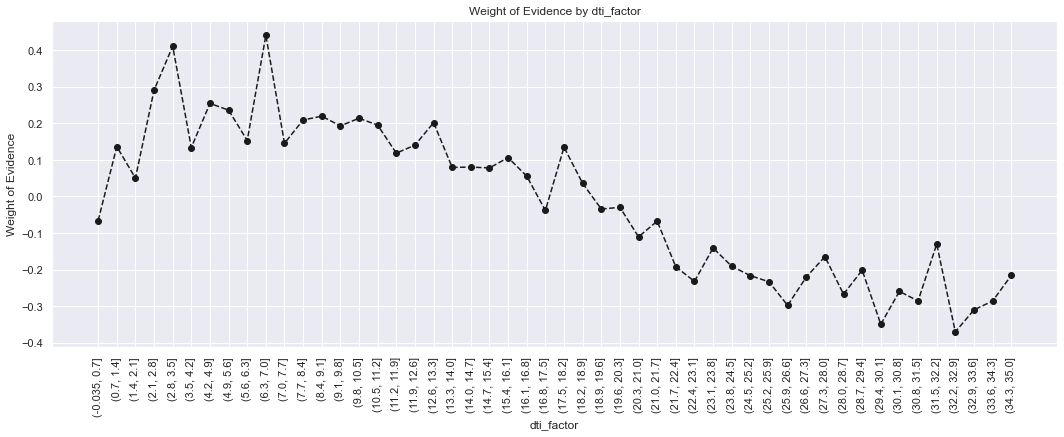

In [1383]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1384]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [1385]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.888889    0.002864    32.0    4.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.939394    0.005250    62.0    4.0   
4                  (10.32, 12.9]     42   0.833333    0.003341    35.0    7.0   
5                  (12.9, 15.48]     69   0.869565    0.005489    60.0    9.0   
6                 (15.48, 18.06]     95   0.863158    0.007557    82.0   13.0   
7                 (18.06, 20.64]     58   0.965517    0.004614    56.0    2.0   
8                 (20.64, 23.22]    101   0.891089    0.008034    90.0   11.0   
9                  (23.22, 25.8]     94   0.946809    0.007478    89.0    5.0   
10                 (25.8, 28.38]    135   0.896296    0.010739   121.0   14.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.923469    0.015591   181.0   15.0   
13                (33.54, 36.12]    195   0.907692    0.015512   177.0   18.0   
14                 (36.12, 38.7]    166   0.909639    0.013205   151.0   15.0   
15                 (38.7, 41.28]    234   0.905983    0.018614   212.0   22.0   
16                (41.28, 43.86]    194   0.896907    0.015432   174.0   20.0   
17                (43.86, 46.44]    328   0.917683    0.026092   301.0   27.0   
18                (46.44, 49.02]    367   0.920981    0.029194   338.0   29.0   
19                 (49.02, 51.6]    231   0.943723    0.018376   218.0   13.0   
20                 (51.6, 54.18]    447   0.926174    0.035558   414.0   33.0   
21                (54.18, 56.76]    264   0.897727    0.021001   237.0   27.0   
22                (56.76, 59.34]    393   0.928753    0.031262   365.0   28.0   
23                (59.34, 61.92]    287   0.909408    0.022830   261.0   26.0   
24                 (61.92, 64.5]    405   0.920988    0.032217   373.0   32.0   
25                 (64.5, 67.08]    394   0.961929    0.031342   379.0   15.0   
26                (67.08, 69.66]    272   0.893382    0.021637   243.0   29.0   
27                (69.66, 72.24]    366   0.912568    0.029115   334.0   32.0   
28                (72.24, 74.82]    231   0.922078    0.018376   213.0   18.0   
29                 (74.82, 77.4]    350   0.920000    0.027842   322.0   28.0   
30                 (77.4, 79.98]    228   0.903509    0.018137   206.0   22.0   
31                (79.98, 82.56]    355   0.895775    0.028240   318.0   37.0   
32                (82.56, 85.14]    288   0.916667    0.022910   264.0   24.0   
33                (85.14, 87.72]    251   0.816733    0.019967   205.0   46.0   
34                 (87.72, 90.3]    345   0.889855    0.027444   307.0   38.0   
35                 (90.3, 92.88]    249   0.843373    0.019807   210.0   39.0   
36                (92.88, 95.46]    385   0.862338    0.030626   332.0   53.0   
37                (95.46, 98.04]    401   0.877805    0.031899   352.0   49.0   
38               (98.04, 100.62]    327   0.871560    0.026012   285.0   42.0   
39               (100.62, 103.2]    526   0.884030    0.041842   465.0   61.0   
40               (103.2, 105.78]    396   0.891414    0.031501   353.0   43.0   
41              (105.78, 108.36]    565   0.886726    0.044945   501.0   64.0   
42              (108.36, 110.94]    407   0.911548    0.032376   371.0   36.0   
43              (110.94, 113.52]    524   0.883588    0.041683   463.0   61.0   
44               (113.52, 116.1]    515   0.908738    0.040967   468.0   47.0   
45               (116.1, 118.68]    314   0.882166    0.024978   277.0   37.0   
46              (118.68, 121.26]     92   0.847826    0.007318    78.0   14.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

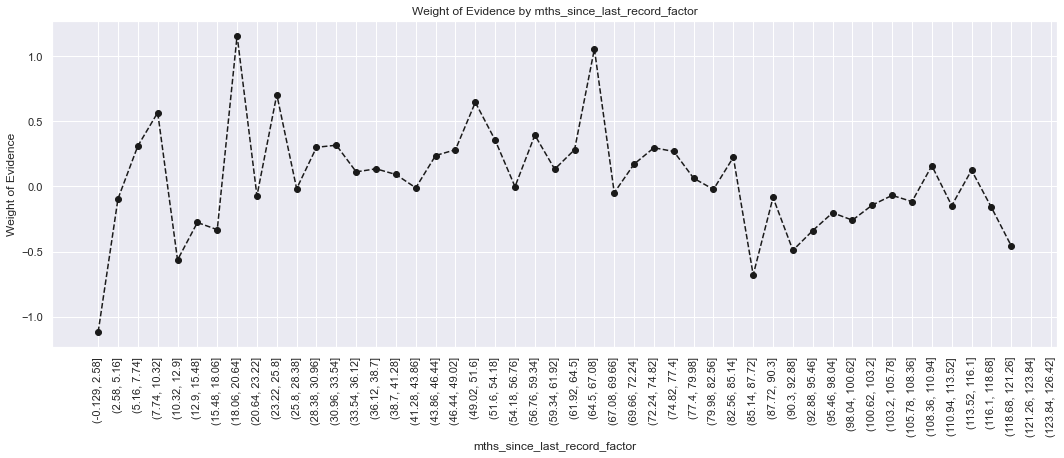

In [1386]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [1387]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# Model building

In [1388]:
df_inputs_prepr.shape

(93257, 324)

In [1389]:
loan_data_inputs_train.shape

(373028, 324)

In [1390]:
loan_data_targets_train.shape

(373028,)

In [1391]:
#loan_data_inputs_train = df_inputs_prepr

In [1392]:
loan_data_inputs_train.shape

(373028, 324)

In [1393]:
loan_data_targets_train.shape

(373028,)

In [1394]:
loan_data_inputs_test = df_inputs_prepr

In [1395]:
loan_data_inputs_test.shape

(93257, 324)

In [1396]:
loan_data_targets_test.shape

(93257,)

In [1397]:
loan_data_inputs_train.shape

(373028, 324)

In [1398]:
loan_data_targets_train.shape

(373028,)

In [1399]:
loan_data_targets_test.shape

(93257,)

In [1402]:
loan_data_targets_test

362514    1
288564    1
213591    1
263083    1
165001    1
         ..
115       1
296284    1
61777     0
91763     1
167512    1
Name: good_bad, Length: 93257, dtype: int32

In [1406]:
loan_data_inputs_train.columns.to_list()

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [ ]:
#Selecting the features

In [1407]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [1408]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [1409]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                                    0                      0        1   
136020      

In [1410]:
inputs_train.shape

(373028, 104)

In [1411]:
#Model building

In [1412]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [1413]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [1414]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [1415]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LogisticRegression()

In [1416]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-1.33110001])

In [1418]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.16008557,  0.90605045,  0.70886028,  0.51906063,  0.33683743,
         0.14489973,  0.09080018,  0.10678409,  0.02966993,  0.05525033,
         0.0566094 ,  0.05940589,  0.07497433,  0.13244715,  0.09936474,
         0.18112675,  0.22496332,  0.22034942,  0.259157  ,  0.31662668,
         0.51750835,  0.0880679 , -0.01075397,  0.30676973,  0.20251147,
         0.21415488,  0.26666797,  0.05443061,  0.07807795,  0.10017774,
         0.12530079,  0.08959927,  0.060845  ,  0.12334575,  1.07505714,
         0.87435367,  0.77403266,  0.57294221,  0.41066058,  0.16587624,
        -0.06981078,  0.85056706,  0.53834968,  0.28958858,  0.10065069,
         0.05613198,  0.03783811,  0.07956532,  0.11955897,  0.12625776,
         0.0742802 ,  0.03130492,  0.63477414,  0.4913794 ,  0.28201265,
        -0.01101415, -0.10865451, -0.13433363, -0.14973951, -0.15435152,
        -0.1193245 , -0.20970959,  0.12264511,  0.17843336, -0.02093653,
         0.02532903,  0.21758339,  0.03470335,  0.0

In [1419]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [1420]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

Feature name  Coefficients
0                              Intercept     -1.331100
1                                grade:A      1.160086
2                                grade:B      0.906050
3                                grade:C      0.708860
4                                grade:D      0.519061
5                                grade:E      0.336837
6                                grade:F      0.144900
7                     home_ownership:OWN      0.090800
8                home_ownership:MORTGAGE      0.106784
9                       addr_state:NM_VA      0.029670
10                         addr_state:NY      0.055250
11          addr_state:OK_TN_MO_LA_MD_NC      0.056609
12                         addr_state:CA      0.059406
13                addr_state:UT_KY_AZ_NJ      0.074974
14             addr_state:AR_MI_PA_OH_MN      0.132447
15             addr_state:RI_MA_DE_SD_IN      0.099365
16                   addr_state:GA_WA_OR      0.181127
17                      addr_state:WI_MT      0.224963
18                         addr_state:TX      0.220349
19                      addr_state:IL_CT      0.259157
20          addr_state:KS_SC_CO_VT_AK_MS      0.316627
21          addr_state:WV_NH_WY_DC_ME_ID      0.517508
22      verification_status:Not Verified      0.088068
23   verification_status:Source Verified     -0.010754
24                   purpose:credit_card      0.306770
25            purpose:debt_consolidation      0.202511
26            purpose:oth__med__vacation      0.214155
27   purpose:major_purch__car__home_impr      0.266668
28                 initial_list_status:w      0.054431
29                               term:36      0.078078
30                          emp_length:1      0.100178
31                        emp_length:2-4      0.125301
32                        emp_length:5-6      0.089599
33                        emp_length:7-9      0.060845
34                         emp_length:10      0.123346
35                mths_since_issue_d:<38      1.075057
36              mths_since_issue_d:38-39      0.874354
37              mths_since_issue_d:40-41      0.774033
38              mths_since_issue_d:42-48      0.572942
39              mths_since_issue_d:49-52      0.410661
40              mths_since_issue_d:53-64      0.165876
41              mths_since_issue_d:65-84     -0.069811
42                       int_rate:<9.548      0.850567
43                 int_rate:9.548-12.025      0.538350
44                 int_rate:12.025-15.74      0.289589
45                 int_rate:15.74-20.281      0.100651
46   mths_since_earliest_cr_line:141-164      0.056132
47   mths_since_earliest_cr_line:165-247      0.037838
48   mths_since_earliest_cr_line:248-270      0.079565
49   mths_since_earliest_cr_line:271-352      0.119559
50      mths_since_earliest_cr_line:>352      0.126258
51                         delinq_2yrs:0      0.074280
52                       delinq_2yrs:1-3      0.031305
53                      inq_last_6mths:0      0.634774
54                    inq_last_6mths:1-2      0.491379
55                    inq_last_6mths:3-6      0.282013
56                          open_acc:1-3     -0.011014
57                         open_acc:4-12     -0.108655
58                        open_acc:13-17     -0.134334
59                        open_acc:18-22     -0.149740
60                        open_acc:23-25     -0.154352
61                        open_acc:26-30     -0.119324
62                         open_acc:>=31     -0.209710
63                           pub_rec:3-4      0.122645
64                           pub_rec:>=5      0.178433
65                       total_acc:28-51     -0.020937
66                        total_acc:>=52      0.025329
67                    acc_now_delinq:>=1      0.217583
68               total_rev_hi_lim:5K-10K      0.034703
69              total_rev_hi_lim:10K-20K      0.002732
70              total_rev_hi_lim:20K-30K      0.001232
71              total_rev_hi_lim:30K-40K      0.014493
72           

In [1421]:
#p-Values

In [1423]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [1424]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [1425]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [1426]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

In [1427]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                              Intercept     -1.331100
1                                grade:A      1.160086
2                                grade:B      0.906050
3                                grade:C      0.708860
4                                grade:D      0.519061
5                                grade:E      0.336837
6                                grade:F      0.144900
7                     home_ownership:OWN      0.090800
8                home_ownership:MORTGAGE      0.106784
9                       addr_state:NM_VA      0.029670
10                         addr_state:NY      0.055250
11          addr_state:OK_TN_MO_LA_MD_NC      0.056609
12                         addr_state:CA      0.059406
13                addr_state:UT_KY_AZ_NJ      0.074974
14             addr_state:AR_MI_PA_OH_MN      0.132447
15             addr_state:RI_MA_DE_SD_IN      0.099365
16                   addr_state:GA_WA_OR      0.181127
17                      addr_state:WI_MT      0.224963
18                         addr_state:TX      0.220349
19                      addr_state:IL_CT      0.259157
20          addr_state:KS_SC_CO_VT_AK_MS      0.316627
21          addr_state:WV_NH_WY_DC_ME_ID      0.517508
22      verification_status:Not Verified      0.088068
23   verification_status:Source Verified     -0.010754
24                   purpose:credit_card      0.306770
25            purpose:debt_consolidation      0.202511
26            purpose:oth__med__vacation      0.214155
27   purpose:major_purch__car__home_impr      0.266668
28                 initial_list_status:w      0.054431
29                               term:36      0.078078
30                          emp_length:1      0.100178
31                        emp_length:2-4      0.125301
32                        emp_length:5-6      0.089599
33                        emp_length:7-9      0.060845
34                         emp_length:10      0.123346
35                mths_since_issue_d:<38      1.075057
36              mths_since_issue_d:38-39      0.874354
37              mths_since_issue_d:40-41      0.774033
38              mths_since_issue_d:42-48      0.572942
39              mths_since_issue_d:49-52      0.410661
40              mths_since_issue_d:53-64      0.165876
41              mths_since_issue_d:65-84     -0.069811
42                       int_rate:<9.548      0.850567
43                 int_rate:9.548-12.025      0.538350
44                 int_rate:12.025-15.74      0.289589
45                 int_rate:15.74-20.281      0.100651
46   mths_since_earliest_cr_line:141-164      0.056132
47   mths_since_earliest_cr_line:165-247      0.037838
48   mths_since_earliest_cr_line:248-270      0.079565
49   mths_since_earliest_cr_line:271-352      0.119559
50      mths_since_earliest_cr_line:>352      0.126258
51                         delinq_2yrs:0      0.074280
52                       delinq_2yrs:1-3      0.031305
53                      inq_last_6mths:0      0.634774
54                    inq_last_6mths:1-2      0.491379
55                    inq_last_6mths:3-6      0.282013
56                          open_acc:1-3     -0.011014
57                         open_acc:4-12     -0.108655
58                        open_acc:13-17     -0.134334
59                        open_acc:18-22     -0.149740
60                        open_acc:23-25     -0.154352
61                        open_acc:26-30     -0.119324
62                         open_acc:>=31     -0.209710
63                           pub_rec:3-4      0.122645
64                           pub_rec:>=5      0.178433
65                       total_acc:28-51     -0.020937
66                        total_acc:>=52      0.025329
67                    acc_now_delinq:>=1      0.217583
68               total_rev_hi_lim:5K-10K      0.034703
69              total_rev_hi_lim:10K-20K      0.002732
70              total_rev_hi_lim:20K-30K      0.001232
71              total_rev_hi_lim:30K-40K      0.014493
72           

In [1428]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [1429]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [1430]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [1431]:
summary_table

Feature name  Coefficients       p_values
0                              Intercept     -1.331100            NaN
1                                grade:A      1.160086   1.708148e-37
2                                grade:B      0.906050   1.040609e-49
3                                grade:C      0.708860   6.552064e-36
4                                grade:D      0.519061   4.997605e-22
5                                grade:E      0.336837   2.510529e-12
6                                grade:F      0.144900   3.858096e-03
7                     home_ownership:OWN      0.090800   6.803481e-06
8                home_ownership:MORTGAGE      0.106784   4.240208e-17
9                       addr_state:NM_VA      0.029670   3.545554e-01
10                         addr_state:NY      0.055250   2.301086e-02
11          addr_state:OK_TN_MO_LA_MD_NC      0.056609   1.480452e-02
12                         addr_state:CA      0.059406   5.208703e-03
13                addr_state:UT_KY_AZ_NJ      0.074974   2.680930e-03
14             addr_state:AR_MI_PA_OH_MN      0.132447   4.609389e-09
15             addr_state:RI_MA_DE_SD_IN      0.099365   8.944029e-04
16                   addr_state:GA_WA_OR      0.181127   1.232269e-11
17                      addr_state:WI_MT      0.224963   2.095627e-06
18                         addr_state:TX      0.220349   2.602460e-17
19                      addr_state:IL_CT      0.259157   8.551210e-19
20          addr_state:KS_SC_CO_VT_AK_MS      0.316627   1.155640e-24
21          addr_state:WV_NH_WY_DC_ME_ID      0.517508   2.421352e-22
22      verification_status:Not Verified      0.088068   2.141836e-09
23   verification_status:Source Verified     -0.010754   4.248705e-01
24                   purpose:credit_card      0.306770   4.120831e-27
25            purpose:debt_consolidation      0.202511   1.002308e-14
26            purpose:oth__med__vacation      0.214155   7.170761e-12
27   purpose:major_purch__car__home_impr      0.266668   1.885626e-17
28                 initial_list_status:w      0.054431   3.067687e-05
29                               term:36      0.078078   3.692950e-08
30                          emp_length:1      0.100178   1.143538e-04
31                        emp_length:2-4      0.125301   3.325269e-11
32                        emp_length:5-6      0.089599   2.869110e-05
33                        emp_length:7-9      0.060845   3.463146e-03
34                         emp_length:10      0.123346   2.303666e-11
35                mths_since_issue_d:<38      1.075057  4.457088e-171
36              mths_since_issue_d:38-39      0.874354  6.689054e-141
37              mths_since_issue_d:40-41      0.774033  3.729970e-116
38              mths_since_issue_d:42-48      0.572942   4.311708e-81
39              mths_since_issue_d:49-52      0.410661   1.074680e-37
40              mths_since_issue_d:53-64      0.165876   3.728858e-08
41              mths_since_issue_d:65-84     -0.069811   1.733790e-02
42                       int_rate:<9.548      0.850567   4.853900e-29
43                 int_rate:9.548-12.025      0.538350   4.524495e-33
44                 int_rate:12.025-15.74      0.289589   4.664186e-15
45                 int_rate:15.74-20.281      0.100651   5.509565e-04
46   mths_since_earliest_cr_line:141-164      0.056132   2.466134e-02
47   mths_since_earliest_cr_line:165-247      0.037838   6.333778e-02
48   mths_since_earliest_cr_line:248-270      0.079565   2.796543e-03
49   mths_since_earliest_cr_line:271-352      0.119559   5.774799e-07
50      mths_since_earliest_cr_line:>352      0.126258   3.073686e-06
51                         delinq_2yrs:0      0.074280   1.935705e-01
52                       delinq_2yrs:1-3      0.031305   5.602072e-01
53                      inq_last_6mths:0      0.634774   3.626108e-08
54                    inq_last_6mths:1-2      0.491379   1.955424e-05
55                    inq_last_6mths:3-6      0.282013   1.467797e-02
56                          open_acc:1

In [1433]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [1434]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [1435]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                                    0                      0        1   
136020      

In [1436]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [1437]:
feature_name = inputs_train.columns.values

In [1438]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                             Intercept     -1.374067
1                               grade:A      1.123650
2                               grade:B      0.878925
3                               grade:C      0.684802
4                               grade:D      0.496923
5                               grade:E      0.321494
6                               grade:F      0.134281
7                    home_ownership:OWN      0.093510
8               home_ownership:MORTGAGE      0.106251
9                      addr_state:NM_VA      0.036020
10                        addr_state:NY      0.055556
11         addr_state:OK_TN_MO_LA_MD_NC      0.057997
12                        addr_state:CA      0.062152
13               addr_state:UT_KY_AZ_NJ      0.076461
14            addr_state:AR_MI_PA_OH_MN      0.133442
15            addr_state:RI_MA_DE_SD_IN      0.097895
16                  addr_state:GA_WA_OR      0.183762
17                     addr_state:WI_MT      0.237929
18                        addr_state:TX      0.220961
19                     addr_state:IL_CT      0.259901
20         addr_state:KS_SC_CO_VT_AK_MS      0.318567
21         addr_state:WV_NH_WY_DC_ME_ID      0.521963
22     verification_status:Not Verified      0.085722
23  verification_status:Source Verified     -0.011182
24                  purpose:credit_card      0.301850
25           purpose:debt_consolidation      0.198082
26           purpose:oth__med__vacation      0.212829
27  purpose:major_purch__car__home_impr      0.266262
28                initial_list_status:w      0.053829
29                              term:36      0.078943
30                         emp_length:1      0.099156
31                       emp_length:2-4      0.125850
32                       emp_length:5-6      0.091091
33                       emp_length:7-9      0.061142
34                        emp_length:10      0.125044
35               mths_since_issue_d:<38      1.084195
36             mths_since_issue_d:38-39      0.879184
37             mths_since_issue_d:40-41      0.778241
38             mths_since_issue_d:42-48      0.577145
39             mths_since_issue_d:49-52      0.415673
40             mths_since_issue_d:53-64      0.169925
41             mths_since_issue_d:65-84     -0.071801
42                      int_rate:<9.548      0.883168
43                int_rate:9.548-12.025      0.558661
44                int_rate:12.025-15.74      0.306131
45                int_rate:15.74-20.281      0.113163
46  mths_since_earliest_cr_line:141-164      0.055770
47  mths_since_earliest_cr_line:165-247      0.037159
48  mths_since_earliest_cr_line:248-270      0.079476
49  mths_since_earliest_cr_line:271-352      0.122039
50     mths_since_earliest_cr_line:>352      0.129360
51                     inq_last_6mths:0      0.666289
52                   inq_last_6mths:1-2      0.519784
53                   inq_last_6mths:3-6      0.309564
54                   acc_now_delinq:>=1      0.180357
55                   annual_inc:20K-30K     -0.081516
56                   annual_inc:30K-40K     -0.018916
57                   annual_inc:40K-50K      0.075682
58                   annual_inc:50K-60K      0.142550
59                   annual_inc:60K-70K      0.218096
60                   annual_inc:70K-80K      0.291550
61                   annual_inc:80K-90K      0.367387
62                  annual_inc:90K-100K      0.387202
63                 annual_inc:100K-120K      0.465106
64                 annual_inc:120K-140K      0.552375
65                     annual_inc:>140K      0.491551
66                            dti:<=1.4      0.252469
67                          dti:1.4-3.5      0.371545
68                          dti:3.5-7.7      0.384456
69                         dti:7.7-10.5      0.319723
70                        dti:10.5-16.1      0.241156
71                        dti:16.1-20.3      0.139852
72                        dti:20.3-21.7      0.127476
73                        dti:2

In [1439]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

Feature name  Coefficients       p_values
0                             Intercept     -1.374067            NaN
1                               grade:A      1.123650   3.236404e-35
2                               grade:B      0.878925   4.272406e-47
3                               grade:C      0.684802   6.704596e-34
4                               grade:D      0.496923   1.346928e-20
5                               grade:E      0.321494   1.025234e-11
6                               grade:F      0.134281   6.242861e-03
7                    home_ownership:OWN      0.093510   3.465432e-06
8               home_ownership:MORTGAGE      0.106251   4.413478e-17
9                      addr_state:NM_VA      0.036020   2.608321e-01
10                        addr_state:NY      0.055556   2.183087e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057997   1.225692e-02
12                        addr_state:CA      0.062152   3.374430e-03
13               addr_state:UT_KY_AZ_NJ      0.076461   2.148080e-03
14            addr_state:AR_MI_PA_OH_MN      0.133442   3.149388e-09
15            addr_state:RI_MA_DE_SD_IN      0.097895   1.033180e-03
16                  addr_state:GA_WA_OR      0.183762   5.573902e-12
17                     addr_state:WI_MT      0.237929   5.618839e-07
18                        addr_state:TX      0.220961   1.835695e-17
19                     addr_state:IL_CT      0.259901   5.674426e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318567   5.114635e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521963   1.071958e-22
22     verification_status:Not Verified      0.085722   4.371417e-09
23  verification_status:Source Verified     -0.011182   4.050803e-01
24                  purpose:credit_card      0.301850   1.257565e-26
25           purpose:debt_consolidation      0.198082   2.505874e-14
26           purpose:oth__med__vacation      0.212829   7.723498e-12
27  purpose:major_purch__car__home_impr      0.266262   1.473599e-17
28                initial_list_status:w      0.053829   3.736625e-05
29                              term:36      0.078943   1.630200e-08
30                         emp_length:1      0.099156   1.314789e-04
31                       emp_length:2-4      0.125850   2.597912e-11
32                       emp_length:5-6      0.091091   2.082272e-05
33                       emp_length:7-9      0.061142   3.287328e-03
34                        emp_length:10      0.125044   1.178892e-11
35               mths_since_issue_d:<38      1.084195  4.804825e-181
36             mths_since_issue_d:38-39      0.879184  1.040836e-149
37             mths_since_issue_d:40-41      0.778241  5.715648e-124
38             mths_since_issue_d:42-48      0.577145   1.098472e-87
39             mths_since_issue_d:49-52      0.415673   8.318238e-41
40             mths_since_issue_d:53-64      0.169925   5.965461e-09
41             mths_since_issue_d:65-84     -0.071801   1.405556e-02
42                      int_rate:<9.548      0.883168   3.576149e-31
43                int_rate:9.548-12.025      0.558661   5.936284e-36
44                int_rate:12.025-15.74      0.306131   7.244086e-17
45                int_rate:15.74-20.281      0.113163   9.369480e-05
46  mths_since_earliest_cr_line:141-164      0.055770   2.498212e-02
47  mths_since_earliest_cr_line:165-247      0.037159   6.426863e-02
48  mths_since_earliest_cr_line:248-270      0.079476   2.455134e-03
49  mths_since_earliest_cr_line:271-352      0.122039   1.893307e-07
50     mths_since_earliest_cr_line:>352      0.129360   1.069363e-06
51                     inq_last_6mths:0      0.666289   3.520195e-14
52                   inq_last_6mths:1-2      0.519784   3.242142e-09
53                   inq_last_6mths:3-6      0.309564   4.603121e-04
54                   acc_now_delinq:>=1      0.180357   8.869148e-02
55                   annual_inc:20K-30K     -0.081516   5.300978e-02
56                   annual_inc:30K-40K     -0.018916   6.403152e-01
57                   annu

In [1441]:
#Pd model test

In [1443]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [1444]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [1445]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                                    0                      1        0   
213591      

In [1446]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [1447]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [1448]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [1449]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.07569427, 0.92430573],
       [0.15076141, 0.84923859],
       [0.11464989, 0.88535011],
       ...,
       [0.02678648, 0.97321352],
       [0.04020839, 0.95979161],
       [0.04763343, 0.95236657]])

In [1450]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.92430573, 0.84923859, 0.88535011, ..., 0.97321352, 0.95979161,
       0.95236657])

In [1451]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [1452]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.92430573, 0.84923859, 0.88535011, ..., 0.97321352, 0.95979161,
       0.95236657])

In [1453]:
loan_data_targets_test_temp = loan_data_targets_test

In [1454]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [1455]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [1456]:
df_actual_predicted_probs.shape

(93257, 2)

In [1457]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [1458]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [1459]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
362514                       1          0.924306
288564                       1          0.849239
213591                       1          0.885350
263083                       1          0.940636
165001                       1          0.968665

In [1461]:
loan_data_inputs_test.shape

(93257, 324)

In [1463]:
loan_data_inputs_test.head(2)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
362514      362514  19677589   21900299      32500        32500   
288564      288564  29755527   32278795      11000        11000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
362514          32500.0   60 months     14.99       773.01     C        C5   
288564          11000.0   60 months     20.99       297.53     E        E4   

                         emp_title emp_length home_ownership  annual_inc  \
362514  Licensed vocational nurse    < 1 year       MORTGAGE     65000.0   
288564               shift manager  10+ years       MORTGAGE     60000.0   

       verification_status issue_d loan_status pymnt_plan  \
362514            Verified  Jul-14  Fully Paid          n   
288564            Verified  Oct-14     Current          n   

                                                      url desc  \
362514  https://www.lendingclub.com/browse/loanDetail....  NaN   
288564  https://www.lendingclub.com/browse/loanDetail....  NaN   

                 purpose                    title zip_code addr_state    dti  \
362514  home_improvement         Home improvement    950xx         CA   9.32   
288564       credit_card  Credit card refinancing    472xx         IN  24.19   

        delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
362514          0.0           Apr-02             0.0                     NaN   
288564          1.0           Aug-03             0.0                     3.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
362514                     NaN       7.0      0.0       1208         4.3   
288564                     NaN      18.0      0.0      13129        54.7   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
362514       20.0                   f       0.00           0.00     38213.56   
288564       43.0                   w    9214.67        9214.67      4450.12   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
362514         38213.56         32500.00        5713.56                 0.0   
288564          4450.12          1785.33        2664.79                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
362514         0.0                      0.0       Oct-15         27391.42   
288564         0.0                      0.0       Jan-16           297.53   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
362514          NaN             Oct-15                         0.0   
288564       Feb-16             Jan-16                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
362514                          NaN            1       INDIVIDUAL   
288564                          NaN            1       INDIVIDUAL   

        annual_inc_joint  dti_joint  verification_status_joint  \
362514               NaN        NaN                        NaN   
288564               NaN        NaN                        NaN   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
362514             0.0           0.0       6563.0          NaN         NaN   
288564             0.0           0.0     107972.0          NaN         NaN   

        open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
362514          NaN          NaN                 NaN           NaN      NaN   
288564          NaN          NaN                 NaN           NaN      NaN   

        open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
362514          NaN          NaN         NaN       NaN           25100.0   
288564          NaN          NaN         NaN       NaN           24000.0   

        inq_fi  total_cu_tl  inq_last_12m  emp_length_int  term_int  \
362514     NaN          NaN           NaN             0.0        60   
288564     NaN          NaN           NaN            10.0        60   

   

In [1464]:
#ROC AUC Curve

In [1501]:
tr = 0.71
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [1502]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted     0      1
Actual                
0           719   9471
1          1400  81667

In [1503]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted         0         1
Actual                       
0          0.007710  0.101558
1          0.015012  0.875720

In [1504]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.8834296621165167

In [1505]:
from sklearn.metrics import roc_curve, roc_auc_score

In [1506]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262878, 0.99262878, 0.99069796, ..., 0.48791077, 0.39373206,
        0.37527664]))

In [1507]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [1508]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

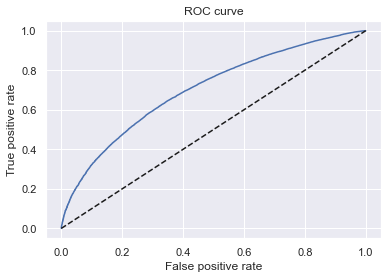

In [1509]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [1510]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7022080506492075

In [ ]:
#Calculating pd of single cx

In [1511]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [1512]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [1513]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.374067            NaN
1                               grade:A      1.123650   3.236404e-35
2                               grade:B      0.878925   4.272406e-47
3                               grade:C      0.684802   6.704596e-34
4                               grade:D      0.496923   1.346928e-20
5                               grade:E      0.321494   1.025234e-11
6                               grade:F      0.134281   6.242861e-03
7                    home_ownership:OWN      0.093510   3.465432e-06
8               home_ownership:MORTGAGE      0.106251   4.413478e-17
9                      addr_state:NM_VA      0.036020   2.608321e-01
10                        addr_state:NY      0.055556   2.183087e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057997   1.225692e-02
12                        addr_state:CA      0.062152   3.374430e-03
13               addr_state:UT_KY_AZ_NJ      0.076461   2.148080e-03
14            addr_state:AR_MI_PA_OH_MN      0.133442   3.149388e-09
15            addr_state:RI_MA_DE_SD_IN      0.097895   1.033180e-03
16                  addr_state:GA_WA_OR      0.183762   5.573902e-12
17                     addr_state:WI_MT      0.237929   5.618839e-07
18                        addr_state:TX      0.220961   1.835695e-17
19                     addr_state:IL_CT      0.259901   5.674426e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318567   5.114635e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521963   1.071958e-22
22     verification_status:Not Verified      0.085722   4.371417e-09
23  verification_status:Source Verified     -0.011182   4.050803e-01
24                  purpose:credit_card      0.301850   1.257565e-26
25           purpose:debt_consolidation      0.198082   2.505874e-14
26           purpose:oth__med__vacation      0.212829   7.723498e-12
27  purpose:major_purch__car__home_impr      0.266262   1.473599e-17
28                initial_list_status:w      0.053829   3.736625e-05
29                              term:36      0.078943   1.630200e-08
30                         emp_length:1      0.099156   1.314789e-04
31                       emp_length:2-4      0.125850   2.597912e-11
32                       emp_length:5-6      0.091091   2.082272e-05
33                       emp_length:7-9      0.061142   3.287328e-03
34                        emp_length:10      0.125044   1.178892e-11
35               mths_since_issue_d:<38      1.084195  4.804825e-181
36             mths_since_issue_d:38-39      0.879184  1.040836e-149
37             mths_since_issue_d:40-41      0.778241  5.715648e-124
38             mths_since_issue_d:42-48      0.577145   1.098472e-87
39             mths_since_issue_d:49-52      0.415673   8.318238e-41
40             mths_since_issue_d:53-64      0.169925   5.965461e-09
41             mths_since_issue_d:65-84     -0.071801   1.405556e-02
42                      int_rate:<9.548      0.883168   3.576149e-31
43                int_rate:9.548-12.025      0.558661   5.936284e-36
44                int_rate:12.025-15.74      0.306131   7.244086e-17
45                int_rate:15.74-20.281      0.113163   9.369480e-05
46  mths_since_earliest_cr_line:141-164      0.055770   2.498212e-02
47  mths_since_earliest_cr_line:165-247      0.037159   6.426863e-02
48  mths_since_earliest_cr_line:248-270      0.079476   2.455134e-03
49  mths_since_earliest_cr_line:271-352      0.122039   1.893307e-07
50     mths_since_earliest_cr_line:>352      0.129360   1.069363e-06
51                     inq_last_6mths:0      0.666289   3.520195e-14
52                   inq_last_6mths:1-2      0.519784   3.242142e-09
53                   inq_last_6mths:3-6      0.309564   4.603121e-04
54                   acc_now_delinq:>=1      0.180357   8.869148e-02
55                   annual_inc:20K-30K     -0.081516   5.300978e-02
56                   annual_inc:30K-40K     -0.018916   6.403152e-01
57                   annu

In [1514]:
y_hat_test_proba

array([0.92430573, 0.84923859, 0.88535011, ..., 0.97321352, 0.95979161,
       0.95236657])

In [1515]:
#Creating a Score Card

In [1516]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.374067            NaN
1                               grade:A      1.123650   3.236404e-35
2                               grade:B      0.878925   4.272406e-47
3                               grade:C      0.684802   6.704596e-34
4                               grade:D      0.496923   1.346928e-20
5                               grade:E      0.321494   1.025234e-11
6                               grade:F      0.134281   6.242861e-03
7                    home_ownership:OWN      0.093510   3.465432e-06
8               home_ownership:MORTGAGE      0.106251   4.413478e-17
9                      addr_state:NM_VA      0.036020   2.608321e-01
10                        addr_state:NY      0.055556   2.183087e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.057997   1.225692e-02
12                        addr_state:CA      0.062152   3.374430e-03
13               addr_state:UT_KY_AZ_NJ      0.076461   2.148080e-03
14            addr_state:AR_MI_PA_OH_MN      0.133442   3.149388e-09
15            addr_state:RI_MA_DE_SD_IN      0.097895   1.033180e-03
16                  addr_state:GA_WA_OR      0.183762   5.573902e-12
17                     addr_state:WI_MT      0.237929   5.618839e-07
18                        addr_state:TX      0.220961   1.835695e-17
19                     addr_state:IL_CT      0.259901   5.674426e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.318567   5.114635e-25
21         addr_state:WV_NH_WY_DC_ME_ID      0.521963   1.071958e-22
22     verification_status:Not Verified      0.085722   4.371417e-09
23  verification_status:Source Verified     -0.011182   4.050803e-01
24                  purpose:credit_card      0.301850   1.257565e-26
25           purpose:debt_consolidation      0.198082   2.505874e-14
26           purpose:oth__med__vacation      0.212829   7.723498e-12
27  purpose:major_purch__car__home_impr      0.266262   1.473599e-17
28                initial_list_status:w      0.053829   3.736625e-05
29                              term:36      0.078943   1.630200e-08
30                         emp_length:1      0.099156   1.314789e-04
31                       emp_length:2-4      0.125850   2.597912e-11
32                       emp_length:5-6      0.091091   2.082272e-05
33                       emp_length:7-9      0.061142   3.287328e-03
34                        emp_length:10      0.125044   1.178892e-11
35               mths_since_issue_d:<38      1.084195  4.804825e-181
36             mths_since_issue_d:38-39      0.879184  1.040836e-149
37             mths_since_issue_d:40-41      0.778241  5.715648e-124
38             mths_since_issue_d:42-48      0.577145   1.098472e-87
39             mths_since_issue_d:49-52      0.415673   8.318238e-41
40             mths_since_issue_d:53-64      0.169925   5.965461e-09
41             mths_since_issue_d:65-84     -0.071801   1.405556e-02
42                      int_rate:<9.548      0.883168   3.576149e-31
43                int_rate:9.548-12.025      0.558661   5.936284e-36
44                int_rate:12.025-15.74      0.306131   7.244086e-17
45                int_rate:15.74-20.281      0.113163   9.369480e-05
46  mths_since_earliest_cr_line:141-164      0.055770   2.498212e-02
47  mths_since_earliest_cr_line:165-247      0.037159   6.426863e-02
48  mths_since_earliest_cr_line:248-270      0.079476   2.455134e-03
49  mths_since_earliest_cr_line:271-352      0.122039   1.893307e-07
50     mths_since_earliest_cr_line:>352      0.129360   1.069363e-06
51                     inq_last_6mths:0      0.666289   3.520195e-14
52                   inq_last_6mths:1-2      0.519784   3.242142e-09
53                   inq_last_6mths:3-6      0.309564   4.603121e-04
54                   acc_now_delinq:>=1      0.180357   8.869148e-02
55                   annual_inc:20K-30K     -0.081516   5.300978e-02
56                   annual_inc:30K-40K     -0.018916   6.403152e-01
57                   annu

In [1517]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [1518]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

Feature name  Coefficients  p_values
0                                        grade:G             0       NaN
1             home_ownership:RENT_OTHER_NONE_ANY             0       NaN
2                addr_state:ND_NE_IA_NV_FL_HI_AL             0       NaN
3                   verification_status:Verified             0       NaN
4   purpose:educ__sm_b__wedd__ren_en__mov__house             0       NaN
5                          initial_list_status:f             0       NaN
6                                        term:60             0       NaN
7                                   emp_length:0             0       NaN
8                         mths_since_issue_d:>84             0       NaN
9                               int_rate:>20.281             0       NaN
10              mths_since_earliest_cr_line:<140             0       NaN
11                             inq_last_6mths:>6             0       NaN
12                              acc_now_delinq:0             0       NaN
13                               annual_inc:<20K             0       NaN
14                                       dti:>35             0       NaN
15                    mths_since_last_delinq:0-3             0       NaN
16                    mths_since_last_record:0-2             0       NaN

In [1519]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1520]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.

In [1521]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1522]:
min_score = 300
max_score = 850

In [1523]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                     -1.374067
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081516
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071801
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011182
Name: Coefficients, dtype: float64

In [1524]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.5385657569092634

In [1525]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -1.374067
acc_now_delinq                 0.180357
addr_state                     0.521963
annual_inc                     0.552375
dti                            0.384456
emp_length                     0.125850
grade                          1.123650
home_ownership                 0.106251
initial_list_status            0.053829
inq_last_6mths                 0.666289
int_rate                       0.883168
mths_since_earliest_cr_line    0.129360
mths_since_issue_d             1.084195
mths_since_last_delinq         0.183100
mths_since_last_record         0.502971
purpose                        0.301850
term                           0.078943
verification_status            0.085722
Name: Coefficients, dtype: float64

In [1526]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.590264927871302

In [1527]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1528]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1529]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1530]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [1537]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

In [1538]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [1539]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1540]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1541]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [1542]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

853.0

In [ ]:
#Calculating score card of an individual 

In [1543]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [1544]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.374067   
1        1                                       grade:A      1.123650   
2        2                                       grade:B      0.878925   
3        3                                       grade:C      0.684802   
4        4                                       grade:D      0.496923   
5        5                                       grade:E      0.321494   
6        6                                       grade:F      0.134281   
7        7                            home_ownership:OWN      0.093510   
8        8                       home_ownership:MORTGAGE      0.106251   
9        9                              addr_state:NM_VA      0.036020   
10      10                                 addr_state:NY      0.055556   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.057997   
12      12                                 addr_state:CA      0.062152   
13      13                        addr_state:UT_KY_AZ_NJ      0.076461   
14      14                     addr_state:AR_MI_PA_OH_MN      0.133442   
15      15                     addr_state:RI_MA_DE_SD_IN      0.097895   
16      16                           addr_state:GA_WA_OR      0.183762   
17      17                              addr_state:WI_MT      0.237929   
18      18                                 addr_state:TX      0.220961   
19      19                              addr_state:IL_CT      0.259901   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.318567   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.521963   
22      22              verification_status:Not Verified      0.085722   
23      23           verification_status:Source Verified     -0.011182   
24      24                           purpose:credit_card      0.301850   
25      25                    purpose:debt_consolidation      0.198082   
26      26                    purpose:oth__med__vacation      0.212829   
27      27           purpose:major_purch__car__home_impr      0.266262   
28      28                         initial_list_status:w      0.053829   
29      29                                       term:36      0.078943   
30      30                                  emp_length:1      0.099156   
31      31                                emp_length:2-4      0.125850   
32      32                                emp_length:5-6      0.091091   
33      33                                emp_length:7-9      0.061142   
34      34                                 emp_length:10      0.125044   
35      35                        mths_since_issue_d:<38      1.084195   
36      36                      mths_since_issue_d:38-39      0.879184   
37      37                      mths_since_issue_d:40-41      0.778241   
38      38                      mths_since_issue_d:42-48      0.577145   
39      39                      mths_since_issue_d:49-52      0.415673   
40      40                      mths_since_issue_d:53-64      0.169925   
41      41                      mths_since_issue_d:65-84     -0.071801   
42      42                               int_rate:<9.548      0.883168   
43      43                         int_rate:9.548-12.025      0.558661   
44      44                         int_rate:12.025-15.74      0.306131   
45      45                         int_rate:15.74-20.281      0.113163   
46      46           mths_since_earliest_cr_line:141-164      0.055770   
47      47           mths_since_earliest_cr_line:165-247      0.037159   
48      48           mths_since_earliest_cr_line:248-270      0.079476   
49      49           mths_since_earliest_cr_line:271-352      0.122039   
50      50              mths_since_earliest_cr_line:>352      0.129360   
51      51                              inq_last_6mths:0      0.666289   
52      52                            inq_last_6mths:1-2      0.519784   
53      5

In [1545]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [1546]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [1547]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514        0                                   0                   0   
288564        0                                   0                   0   
213591        0                                   0                   0   
263083        0                                   0                   0   
165001        0                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1  

In [1548]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [1549]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                   

In [1550]:
scorecard_scores = df_scorecard['Score - Final']

In [1551]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [1552]:
scorecard_scores.shape

(102,)

In [1553]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [1554]:
scorecard_scores.shape

(102, 1)

In [1555]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

# Credit score prediction

In [1556]:
y_scores.head()

0
362514  614.0
288564  553.0
213591  579.0
263083  633.0
165001  685.0

In [1557]:
y_scores.tail()

0
115     573.0
296284  679.0
61777   696.0
91763   664.0
167512  651.0

# From credit score to find out pd

In [1558]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [1559]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

0
362514  0.926310
288564  0.850775
213591  0.888716
263083  0.941454
165001  0.969279

In [1560]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

0
362514  0.926310
288564  0.850775
213591  0.888716
263083  0.941454
165001  0.969279

In [1561]:
y_hat_test_proba[0: 5]

array([0.92430573, 0.84923859, 0.88535011, 0.94063622, 0.96866503])

In [1562]:
df_actual_predicted_probs['y_hat_test_proba'].head()

362514    0.924306
288564    0.849239
213591    0.885350
263083    0.940636
165001    0.968665
Name: y_hat_test_proba, dtype: float64